<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#What-if-we-take-an-experiment-where-we-know-that-we-reached-perfect-balance?" data-toc-modified-id="What-if-we-take-an-experiment-where-we-know-that-we-reached-perfect-balance?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What if we take an experiment where we know that we reached perfect balance?</a></span></li><li><span><a href="#Comparison-between-fixed-and-line-search-on-the-same-graph" data-toc-modified-id="Comparison-between-fixed-and-line-search-on-the-same-graph-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison between fixed and line search on the same graph</a></span><ul class="toc-item"><li><span><a href="#Testing-Fixed-step" data-toc-modified-id="Testing-Fixed-step-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Testing Fixed step</a></span></li><li><span><a href="#Testing-Line-Search" data-toc-modified-id="Testing-Line-Search-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Testing Line Search</a></span><ul class="toc-item"><li><span><a href="#Actually-compare-assignments-and-results-from-both-line-search-and-fixed-step" data-toc-modified-id="Actually-compare-assignments-and-results-from-both-line-search-and-fixed-step-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Actually compare assignments and results from both line search and fixed step</a></span><ul class="toc-item"><li><span><a href="#Objective-value" data-toc-modified-id="Objective-value-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Objective value</a></span></li><li><span><a href="#Flows" data-toc-modified-id="Flows-3.2.1.2"><span class="toc-item-num">3.2.1.2&nbsp;&nbsp;</span>Flows</a></span></li><li><span><a href="#Costs" data-toc-modified-id="Costs-3.2.1.3"><span class="toc-item-num">3.2.1.3&nbsp;&nbsp;</span>Costs</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Why-is-the-line-search-not-as-good-an-assignment?" data-toc-modified-id="Why-is-the-line-search-not-as-good-an-assignment?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Why is the line search not as good an assignment?</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Is-this-an-issue-with-the-capacities-(too-low-and-therefore-too-steep-for-the-inverse-demand?)----I-doubt-it-but-well" data-toc-modified-id="Is-this-an-issue-with-the-capacities-(too-low-and-therefore-too-steep-for-the-inverse-demand?)----I-doubt-it-but-well-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>Is this an issue with the capacities (too low and therefore too steep for the inverse demand?) -- I doubt it but well</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Debugging" data-toc-modified-id="Debugging-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Debugging</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Evolving-bounds?" data-toc-modified-id="Evolving-bounds?-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Evolving bounds?</a></span></li></ul></li></ul></li><li><span><a href="#2-Nodes-with-no-NN-init" data-toc-modified-id="2-Nodes-with-no-NN-init-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2 Nodes with no NN init</a></span></li><li><span><a href="#2-Nodes-with-no-NN-init,-with-a-longer-inner-iteration" data-toc-modified-id="2-Nodes-with-no-NN-init,-with-a-longer-inner-iteration-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>2 Nodes with no NN init, with a longer inner iteration</a></span></li><li><span><a href="#2-Nodes-WITH-NN-init" data-toc-modified-id="2-Nodes-WITH-NN-init-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>2 Nodes WITH NN init</a></span></li></ul></div>

This notebook is to enable line search. We will use this notebook exclusively to debug the implementation of line search on a single instance of the graph. 

# Load

In [4]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list
from amod_ed.result_analysis import plot_stop_and_cost

from amod_ed.FW_OuterUpdate import FW_graph_extension

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# What if we take an experiment where we know that we reached perfect balance? 

In [5]:
subfolder = 'unstucking_balance'

In [6]:
n_nodes=2

In [7]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [8]:
print(os.listdir(path))

['line_search_notNNinit_longerNI.pkl', 'new_init.pkl', 'initial_setup.pkl', 'line_search_notNNinit.pkl', 'line_search_withNNinit.pkl', 'new_init_with_step.pkl']


In [9]:
filename=os.listdir(path)[2]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW_GOOD, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

initial_setup.pkl


In [10]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

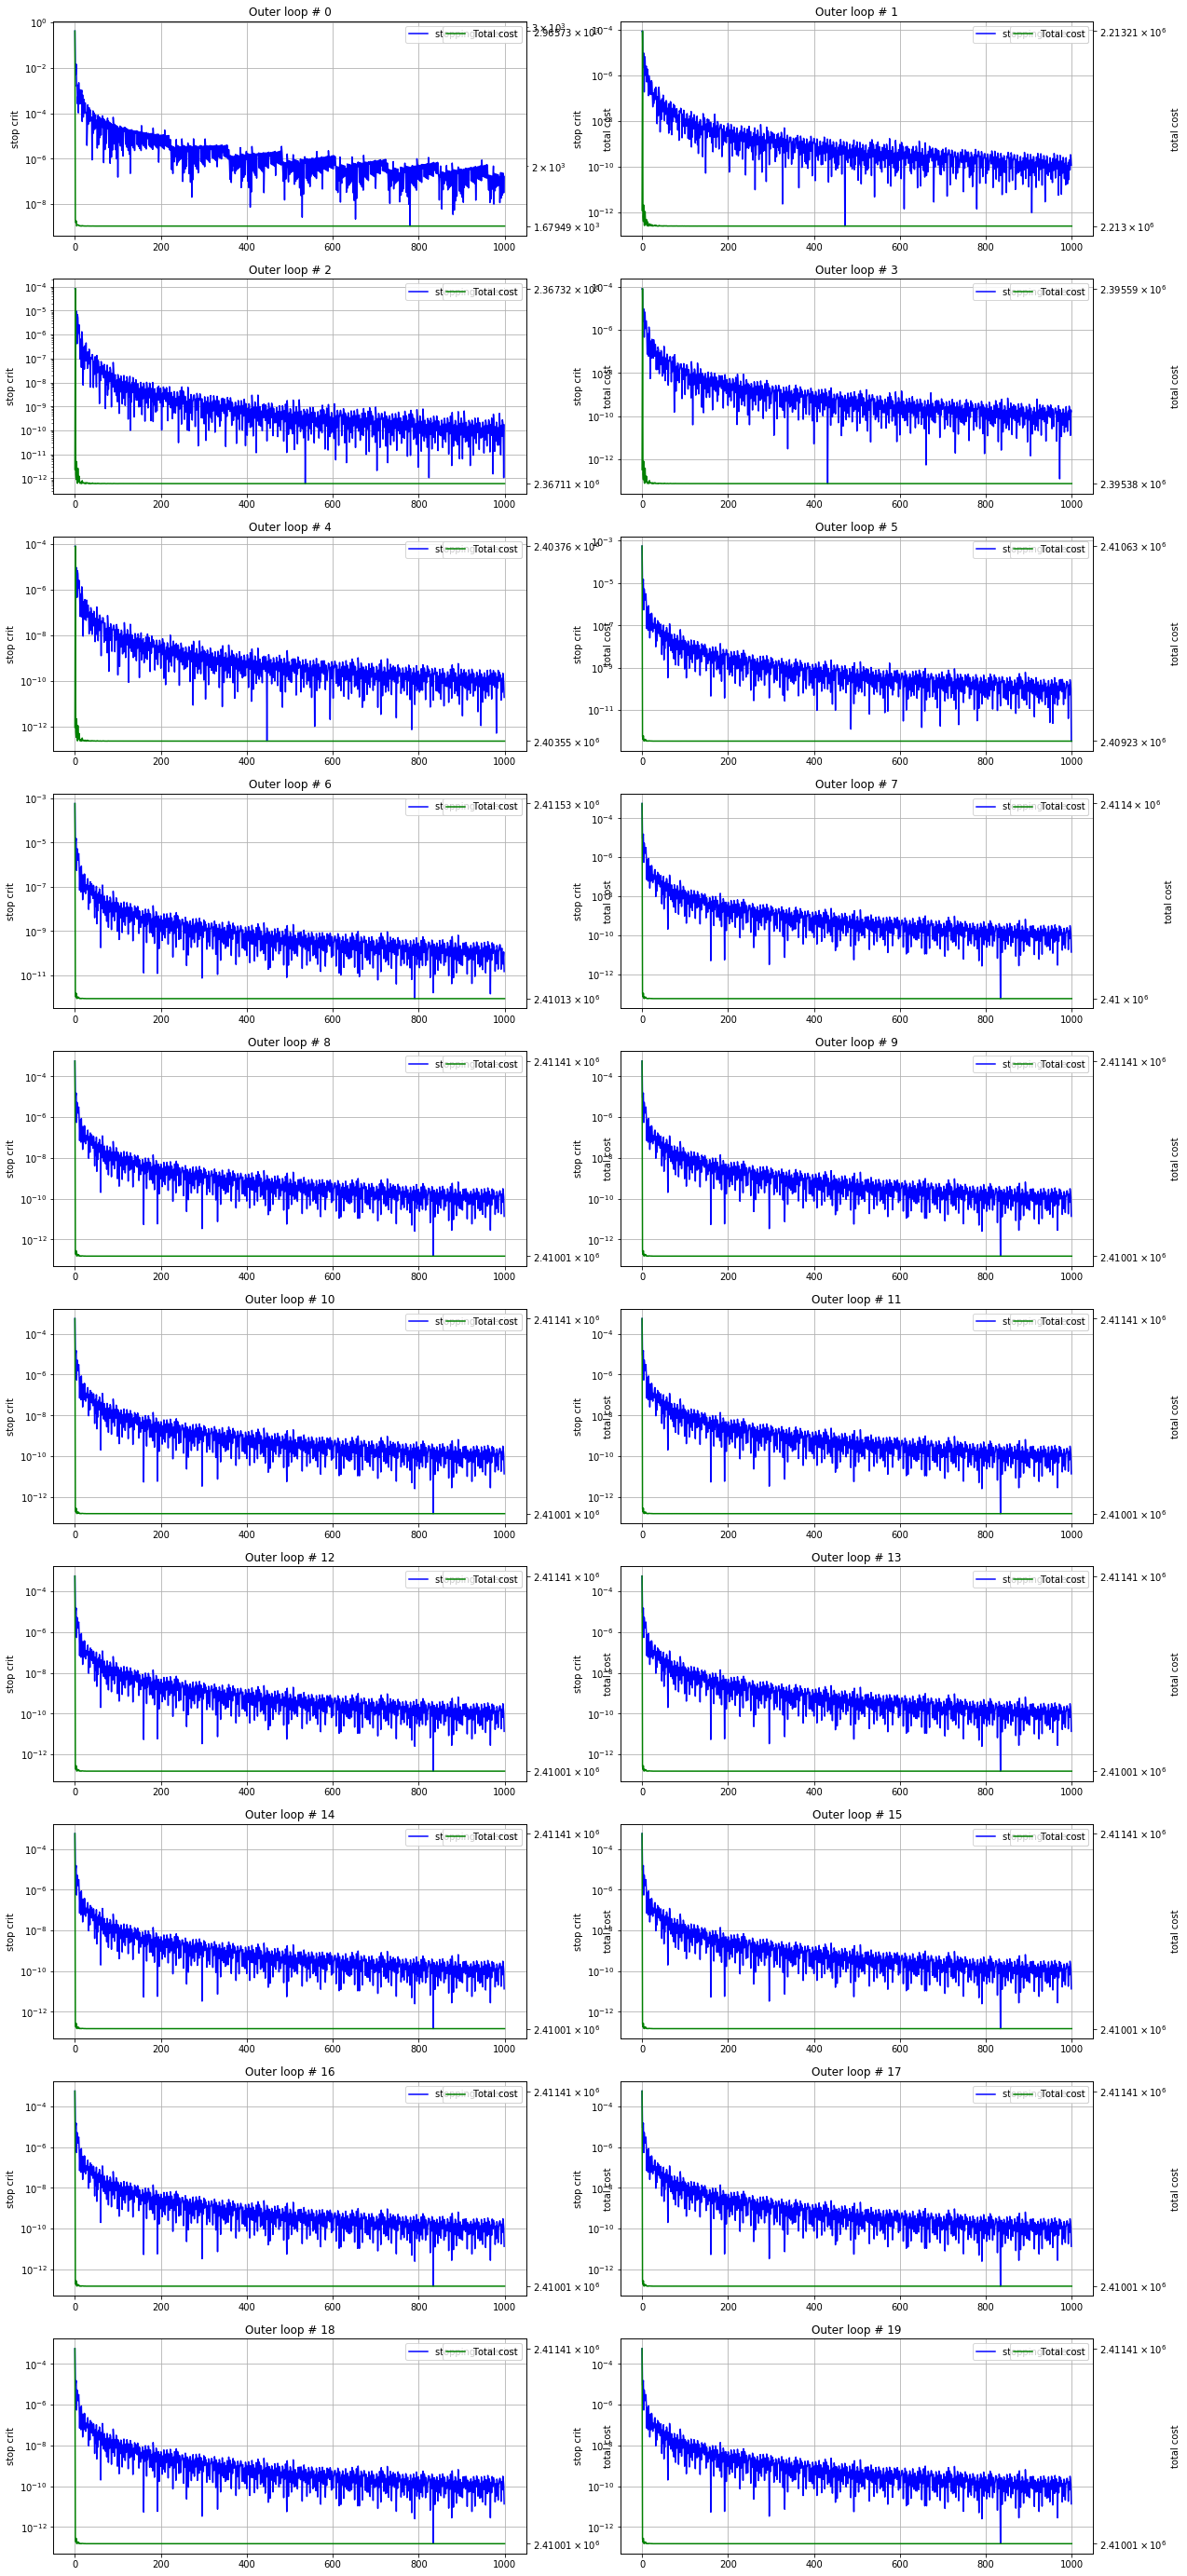

In [11]:
plot_stop_and_cost(opt_res)

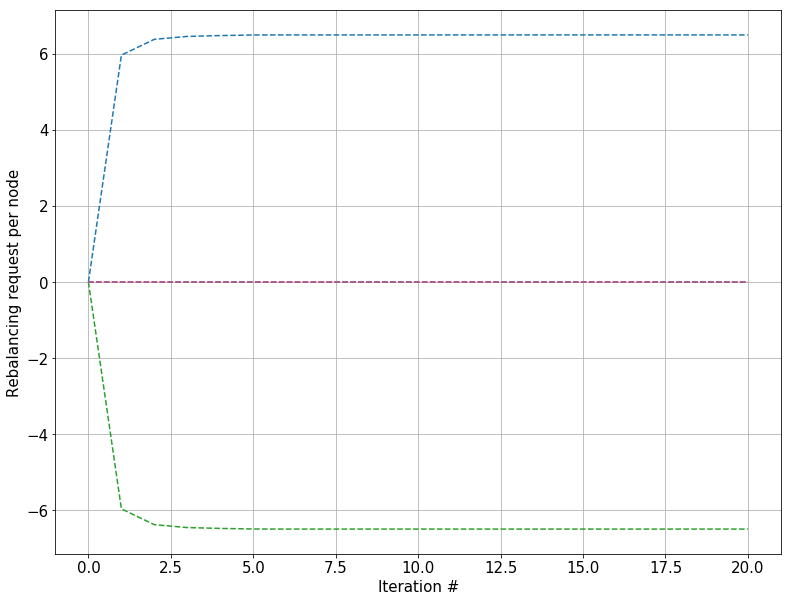

In [13]:
plot_ri_list(ri_FW_GOOD, save = False, path = None)

In [14]:
ri_FW_GOOD

[{'0': 0, '0_p': 0, '1': 0, '1_p': 0, 'R': 0},
 {'0': 5.963058897190618,
  '0_p': 0.0,
  '1': -5.963058897190618,
  '1_p': 0.0,
  'R': 0.0},
 {'0': 6.378631348691216,
  '0_p': 0.0,
  '1': -6.378631348691216,
  '1_p': 0.0,
  'R': 0.0},
 {'0': 6.454862502766681,
  '0_p': 0.0,
  '1': -6.454862502766681,
  '1_p': 0.0,
  'R': 0.0},
 {'0': 6.476876416996163,
  '0_p': 0.0,
  '1': -6.476876416996163,
  '1_p': 0.0,
  'R': 0.0},
 {'0': 6.492210384425938,
  '0_p': 0.0,
  '1': -6.492210384425938,
  '1_p': 0.0,
  'R': 0.0},
 {'0': 6.494623141329715,
  '0_p': 0.0,
  '1': -6.494623141329715,
  '1_p': 0.0,
  'R': 0.0},
 {'0': 6.494284158954802,
  '0_p': 0.0,
  '1': -6.494284158954802,
  '1_p': 0.0,
  'R': 0.0},
 {'0': 6.494304099094502,
  '0_p': 0.0,
  '1': -6.494304099094502,
  '1_p': 0.0,
  'R': 0.0},
 {'0': 6.494304099094502,
  '0_p': 0.0,
  '1': -6.494304099094502,
  '1_p': 0.0,
  'R': 0.0},
 {'0': 6.494304099094502,
  '0_p': 0.0,
  '1': -6.494304099094502,
  '1_p': 0.0,
  'R': 0.0},
 {'0': 6.4943

There is absolutely no oscillation in the ri

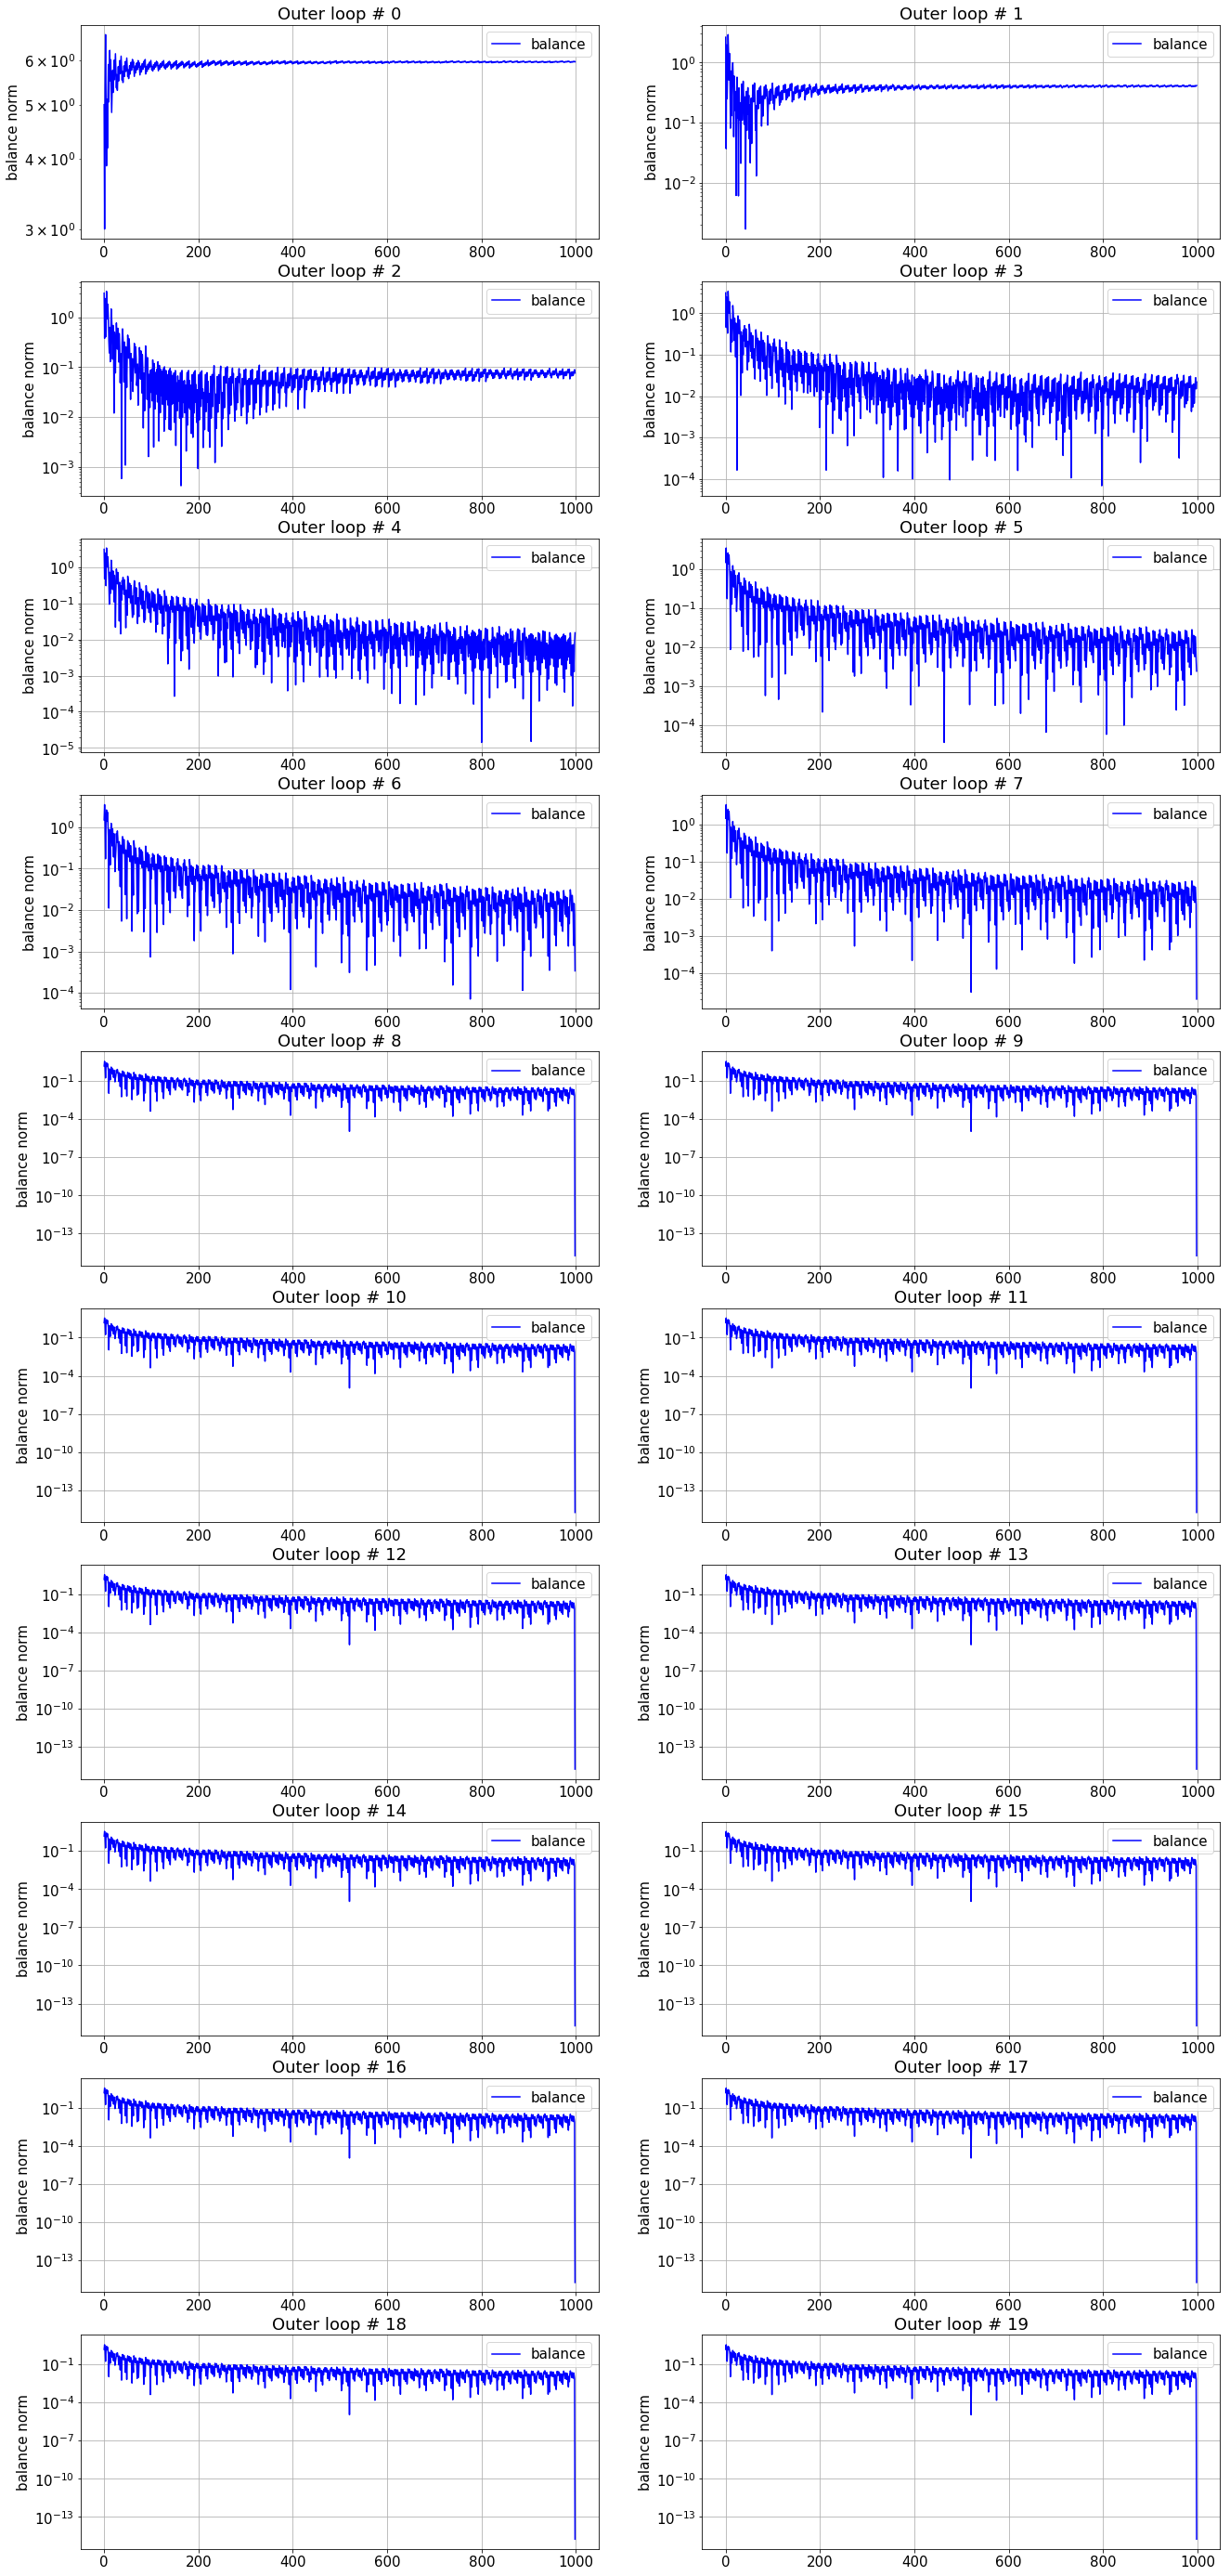

In [15]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

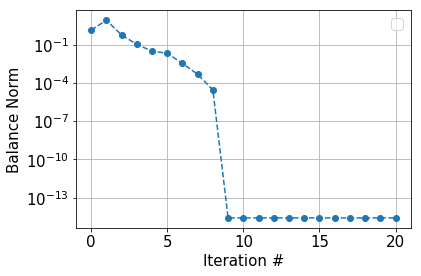

In [16]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

we know that at the end we have a good guess of rebalancers

In [84]:
ri_FW_GOOD[-1]

{'0': 6.494304099094502,
 '0_p': 0.0,
 '1': -6.494304099094502,
 '1_p': 0.0,
 'R': 0.0}

In [19]:
G_GOOD = G_FW[-1][0]

We will consider this as the real ri_FW

# Comparison between fixed and line search on the same graph

## Testing Fixed step

We load a previous experiment just to have the graphs etc. 

In [27]:
G_ref = G_GOOD
ri_ref = ri_FW_GOOD[-2]

In [26]:
ri_ref

{'0': 6.494304099094502,
 '0_p': 0.0,
 '1': -6.494304099094502,
 '1_p': 0.0,
 'R': 0.0}

We are going to solve only the inner iterations, as they are the ones causing problems

In [36]:
edge_list =[]
for e in G_ref.edges():
    edge_list.append(e)

In [62]:
G_list, y_list, opt_res, OD_list, i, balance_list = FW_graph_extension(G_ref, OD, edge_list, ri_ref, FW_tol=0,
                       step='fixed', evolving_bounds=False, max_iter=1000,
                       stopping_criterion='relative_progress', update_factor=False, i_offset = 0)

    Max inner iterations reached
     Number of inner loop iterations:  1000


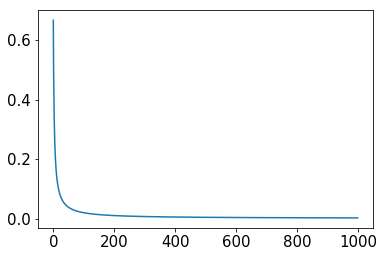

In [43]:
plt.plot(opt_res['a_k'])

2410009.7654836252


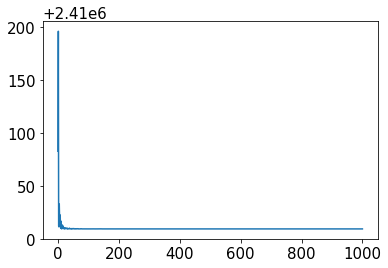

In [58]:
plt.plot(opt_res['obj'])
print(opt_res['obj'][-1])

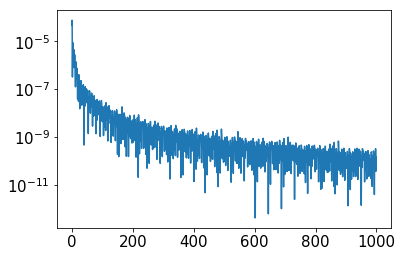

In [45]:
plt.plot(opt_res['stop'])
plt.yscale('log')

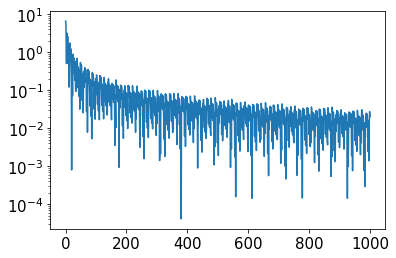

In [46]:
plt.plot(balance_list)
plt.yscale('log')

this might be one of the reasons we see bumps : the scale (because we do not initialize very well). 

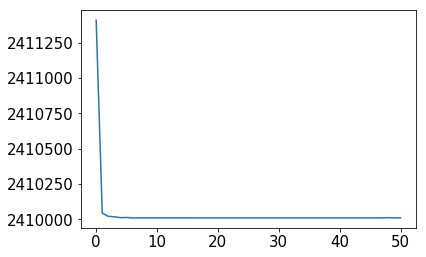

In [100]:
plt.plot(opt_res['obj'])
# plt.yscale('log')

In [66]:
G_ = G_list[-1]

In [68]:
for e in G_.edges():
    print(G_[e[0]][e[1]]['f_m'])

9.404467134713856
0.0
2.3232011025379267
0.5955328652861422
2.3232011025379267
0.0
9.404467134713856
7.6767988974620724


Here, we give it the "optimal" ri but it still does not lead us to a good balance value... 

And we still have optimal, inaccurate...

## Testing Line Search

In [47]:
ri_ref

{'0': 6.494304099094502,
 '0_p': 0.0,
 '1': -6.494304099094502,
 '1_p': 0.0,
 'R': 0.0}

We are going to solve only the inner iterations, as they are the ones causing problems

In [97]:
edge_list =[]
for e in G_ref.edges():
    edge_list.append(e)

In [61]:
G_list_ls, y_list, opt_res_ls, OD_list, i, balance_list = FW_graph_extension(G_ref, OD, edge_list, ri_ref, FW_tol=0,
                       step='line_search', evolving_bounds=False, max_iter=100,
                       stopping_criterion='relative_progress', update_factor=1.1, i_offset = 0)

('0', '1') 0.0 + var179630 * 10.0
('0', 'R') 6.494304099094502 + var179630 * 0.0
('0', '1_p') 0.0 + var179630 * 10.0
('0', '0_p') 10.0 + var179630 * -10.0
('1', '0') 6.494304099094502 + var179630 * 10.0
('1', 'R') 0.0 + var179630 * 0.0
('1', '0_p') 0.0 + var179630 * 10.0
('1', '1_p') 10.0 + var179630 * -10.0
solver ECOS: 0.3541621919719779
Status of line search problem :  optimal_inaccurate
('0', '1') 3.541621919719779 + var180340 * 6.458378080280221
('0', 'R') 6.494304099094501 + var180340 * 8.881784197001252e-16
('0', '1_p') 3.541621919719779 + var180340 * -3.541621919719779
('0', '0_p') 6.45837808028022 + var180340 * -6.45837808028022
('1', '0') 10.03592601881428 + var180340 * -3.541621919719778
('1', 'R') 0.0 + var180340 * 0.0
('1', '0_p') 3.541621919719779 + var180340 * 6.458378080280221
('1', '1_p') 6.45837808028022 + var180340 * 3.5416219197197796
solver ECOS: 0.5094697667342015
Status of line search problem :  optimal_inaccurate
('0', '1') 6.831970293761424 + var181050 * 3.1680

solver ECOS: 0.0002057273922794374
Status of line search problem :  optimal_inaccurate
('0', '1') 8.960658542092922 + var190280 * 1.0393414579070779
('0', 'R') 6.494304099094503 + var190280 * -8.881784197001252e-16
('0', '1_p') 2.9714635285559337 + var190280 * -2.9714635285559337
('0', '0_p') 1.039341457907077 + var190280 * -1.039341457907077
('1', '0') 9.465767627650436 + var190280 * -2.971463528555934
('1', 'R') 0.0 + var190280 * 0.0
('1', '0_p') 8.960658542092922 + var190280 * 1.0393414579070779
('1', '1_p') 7.028536471444064 + var190280 * 2.971463528555936
solver ECOS: 0.0004917551866272271
Status of line search problem :  optimal_inaccurate
('0', '1') 8.961169643645524 + var190990 * 1.0388303563544756
('0', 'R') 6.494304099094503 + var190990 * -8.881784197001252e-16
('0', '1_p') 2.9700022959538925 + var190990 * -2.9700022959538925
('0', '0_p') 1.0388303563544745 + var190990 * -1.0388303563544745
('1', '0') 9.464306395048396 + var190990 * -2.9700022959538943
('1', 'R') 0.0 + var190

solver ECOS: 0.0001252710203303196
Status of line search problem :  optimal_inaccurate
('0', '1') 9.160292916116537 + var200930 * 0.8397070838834626
('0', 'R') 6.494304099094503 + var200930 * -8.881784197001252e-16
('0', '1_p') 3.0423423653615527 + var200930 * -3.0423423653615527
('0', '0_p') 0.8397070838834673 + var200930 * -0.8397070838834673
('1', '0') 9.536646464456055 + var200930 * -3.042342365361553
('1', 'R') 0.0 + var200930 * 0.0
('1', '0_p') 9.160292916116537 + var200930 * 0.8397070838834626
('1', '1_p') 6.957657634638445 + var200930 * 3.042342365361555
solver ECOS: 5.52129835433241e-06
Status of line search problem :  optimal_inaccurate
('0', '1') 9.160297552389878 + var201640 * 0.8397024476101222
('0', 'R') 6.494304099094503 + var201640 * -8.881784197001252e-16
('0', '1_p') 3.0423255676816576 + var201640 * -3.0423255676816576
('0', '0_p') 0.8397024476101269 + var201640 * -0.8397024476101269
('1', '0') 9.536629666776161 + var201640 * -3.042325567681659
('1', 'R') 0.0 + var201

solver ECOS: 4.657431395949871e-05
Status of line search problem :  optimal_inaccurate
('0', '1') 8.715149698862081 + var213000 * 1.2848503011379186
('0', 'R') 6.494304099094502 + var213000 * 0.0
('0', '1_p') 2.84440674859111 + var213000 * -2.84440674859111
('0', '0_p') 1.2848503011379204 + var213000 * -1.2848503011379204
('1', '0') 9.338710847685611 + var213000 * -2.8444067485911093
('1', 'R') 0.0 + var213000 * 0.0
('1', '0_p') 8.715149698862081 + var213000 * 1.2848503011379186
('1', '1_p') 7.155593251408889 + var213000 * 2.844406748591111
solver ECOS: 0.20737948299460987
Status of line search problem :  optimal_inaccurate
('0', '1') 8.981601290037531 + var213710 * 1.0183987099624687
('0', 'R') 6.494304099094502 + var213710 * 0.0
('0', '1_p') 2.2545351476419064 + var213710 * 7.745464852358094
('0', '0_p') 1.0183987099624696 + var213710 * -1.0183987099624696
('1', '0') 8.74883924673641 + var213710 * 7.745464852358094
('1', 'R') 0.0 + var213710 * 0.0
('1', '0_p') 8.981601290037531 + var

solver ECOS: 1.840637620973822e-05
Status of line search problem :  optimal_inaccurate
('0', '1') 8.757311557836328 + var223650 * 1.2426884421636721
('0', 'R') 6.494304099094504 + var223650 * -1.7763568394002505e-15
('0', '1_p') 2.8660852312366107 + var223650 * -2.8660852312366107
('0', '0_p') 1.2426884421636741 + var223650 * -1.2426884421636741
('1', '0') 9.360389330331115 + var223650 * -2.866085231236613
('1', 'R') 0.0 + var223650 * 0.0
('1', '0_p') 8.757311557836328 + var223650 * 1.2426884421636721
('1', '1_p') 7.1339147687633915 + var223650 * 2.8660852312366085
solver ECOS: 1.1539492189014814e-05
Status of line search problem :  optimal_inaccurate
('0', '1') 8.7573258978299 + var224360 * 1.2426741021701009
('0', 'R') 6.494304099094504 + var224360 * -1.7763568394002505e-15
('0', '1_p') 2.866052158068472 + var224360 * -2.866052158068472
('0', '0_p') 1.2426741021701024 + var224360 * -1.2426741021701024
('1', '0') 9.360356257162977 + var224360 * -2.8660521580684746
('1', 'R') 0.0 + var

solver ECOS: 2.6876835605381758e-05
Status of line search problem :  optimal_inaccurate
('0', '1') 8.758811028333335 + var234300 * 1.2411889716666646
('0', 'R') 6.494304099094501 + var234300 * 8.881784197001252e-16
('0', '1_p') 2.862626914493374 + var234300 * -2.862626914493374
('0', '0_p') 1.2411889716666622 + var234300 * -1.2411889716666622
('1', '0') 9.356931013587875 + var234300 * -2.862626914493373
('1', 'R') 0.0 + var234300 * 0.0
('1', '0_p') 8.758811028333335 + var234300 * 1.2411889716666646
('1', '1_p') 7.137373085506625 + var234300 * 2.862626914493375
solver ECOS: 0.00016353475036065844
Status of line search problem :  optimal_inaccurate
('0', '1') 8.759014005861967 + var235010 * 1.2409859941380326
('0', 'R') 6.4943040990945 + var235010 * 1.7763568394002505e-15
('0', '1_p') 2.8621587755155367 + var235010 * -2.8621587755155367
('0', '0_p') 1.2409859941380303 + var235010 * -1.2409859941380303
('1', '0') 9.356462874610036 + var235010 * -2.8621587755155344
('1', 'R') 0.0 + var2350

solver ECOS: 1.260772775219047e-06
Status of line search problem :  optimal_inaccurate
('0', '1') 8.774841085853918 + var244950 * 1.225158914146082
('0', 'R') 6.494304099094498 + var244950 * 4.440892098500626e-15
('0', '1_p') 2.8256558527559457 + var244950 * -2.8256558527559457
('0', '0_p') 1.2251589141460772 + var244950 * -1.2251589141460772
('1', '0') 9.319959951850443 + var244950 * -2.8256558527559408
('1', 'R') 0.0 + var244950 * 0.0
('1', '0_p') 8.774841085853918 + var244950 * 1.225158914146082
('1', '1_p') 7.174344147244051 + var244950 * 2.8256558527559488
solver ECOS: 4.6295769646495984e-06
Status of line search problem :  optimal_inaccurate
('0', '1') 8.774846757821404 + var245660 * 1.225153242178596
('0', 'R') 6.494304099094498 + var245660 * 4.440892098500626e-15
('0', '1_p') 2.8256427711647 + var245660 * -2.8256427711647
('0', '0_p') 1.2251532421785902 + var245660 * -1.2251532421785902
('1', '0') 9.319946870259198 + var245660 * -2.825642771164696
('1', 'R') 0.0 + var245660 * 0

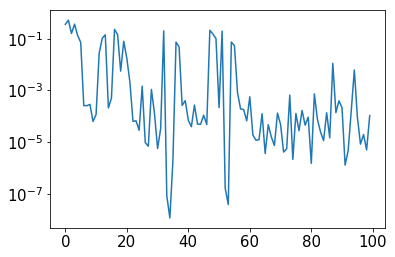

In [52]:
plt.plot(opt_res['a_k'])
plt.yscale('log')

2410010.167026046


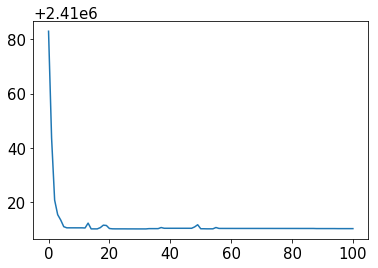

In [56]:
plt.plot(opt_res['obj'])
print(opt_res['obj'][-1])

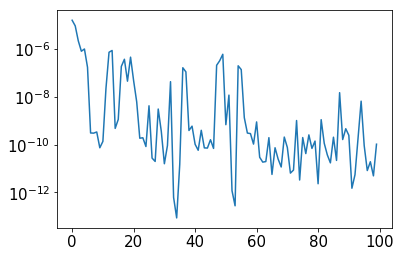

In [54]:
plt.plot(opt_res['stop'])
plt.yscale('log')

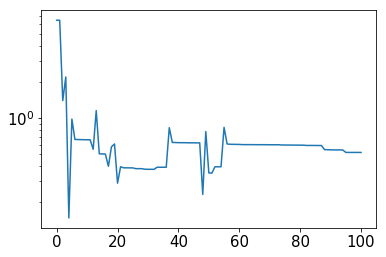

In [55]:
plt.plot(balance_list)
plt.yscale('log')

this might be one of the reasons we see bumps : the scale (because we do not initialize very well). 

Here, we give it the "optimal" ri but it still does not lead us to a good balance value... 

And we still have optimal, inaccurate...

### Actually compare assignments and results from both line search and fixed step

In [81]:
from amod_ed.routines_icu import check_flow_cons_at_OD_nodes, check_flow_cons

In [82]:
from amod_ed.result_analysis import print_final_cost, print_final_flows

#### Objective value

We see that the fixed step routine solves it better. 

In [79]:
opt_res['obj'][-1]

2410009.7654836252

In [80]:
opt_res_ls['obj'][-1]

2410010.167026046

#### Flows

We see there is a difference in both assignments (of course). 

The main difference is on the axis 0_1.

In [60]:
G_ls = G_list_ls[-1]
G_f = G_list[-1]

Comparing both assignments and quantifying the difference.

In [71]:
for e in G_ls.edges():
    f_ls = G_ls[e[0]][e[1]]['f_m']+G_ls[e[0]][e[1]]['f_r']
    f_f =  G_f[e[0]][e[1]]['f_m']+G_f[e[0]][e[1]]['f_r']
    diff = np.abs(f_ls-f_f)/f_f
    
    print(e,  f_ls, f_f, np.around(100*diff, 4))

('0', '1') 8.782705913998862 9.260380338224643 5.1583
('0', 'R') 6.494304099094498 6.494304099094499 0.0
('0', '1_p') 2.8075167383748716 2.7863354210659566 0.7602
('0', '0_p') 1.2172940860011305 0.7396196617753502 64.5838
('1', '0') 9.30182083746937 9.280639520160456 0.2282
('1', 'R') 0.0 0.0 nan
('1', '0_p') 8.782705913998862 9.260380338224643 5.1583
('1', '1_p') 7.192483261625125 7.213664578934038 0.2936


/Users/lucasfuentes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Line Search

In [73]:
for e in G_ls.edges():
    
    print(e,  G_ls[e[0]][e[1]]['f_m'], G_ls[e[0]][e[1]]['f_r'])
    

('0', '1') 8.782705913998862 0.0
('0', 'R') 0.0 6.494304099094498
('0', '1_p') 2.8075167383748716 0.0
('0', '0_p') 1.2172940860011305 0.0
('1', '0') 2.8075167383748716 6.494304099094498
('1', 'R') 0.0 0
('1', '0_p') 8.782705913998862 0.0
('1', '1_p') 7.192483261625125 0.0


Fixed Step

In [74]:
for e in G_f.edges():
    
    print(e,  G_f[e[0]][e[1]]['f_m'], G_f[e[0]][e[1]]['f_r'])

('0', '1') 9.260380338224643 0.0
('0', 'R') 0.0 6.494304099094499
('0', '1_p') 2.7863354210659566 0.0
('0', '0_p') 0.7396196617753502 0.0
('1', '0') 2.7863354210659566 6.494304099094499
('1', 'R') 0.0 0
('1', '0_p') 9.260380338224643 0.0
('1', '1_p') 7.213664578934038 0.0


#### Costs

The costs, though, are really similar. This is of course due to the nonlinearity of cost functions. Considering the computation is based on costs, it is rather difficult to understand why one method works better than the other. 

In [87]:
for e in G_ls.edges():
    c_ls = G_ls[e[0]][e[1]]['cost']
    c_f =  G_f[e[0]][e[1]]['cost']
    diff = np.abs(c_ls-c_f)/c_f
    
    print(e,  c_ls, c_f, np.around(100*diff, 4))
    

('0', '1') 39.212973347524766 39.971083843280454 1.8966
('0', 'R') 413999.9999999999 413999.9999999999 0.0
('0', '1_p') 48.141886156459734 48.01829969693473 0.2574
('0', '0_p') 88.0 88.0 0.0
('1', '0') 40.04264532646861 40.00594863253963 0.0917
('1', 'R') 10000000000000000000000 10000000000000000000000 0.0
('1', '0_p') 47.212973347524766 47.971083843280454 1.5803
('1', '1_p') 88.0 88.0 0.0


# Why is the line search not as good an assignment? 

What is very disturbing is that you solve EXACTLY the same problem as with the fixed step. However, you are not able to get as good an answer. 

In the analyses above, we find that
- the graph is better balanced with fixed step
- the difference in flows might be large
- but the difference in costs is very small

However, considering the very nature of line search, we would be expecting line search to perform better. Now, we see it is optimal inaccurate every time. That might of course mean something. 

What are the possibilities? 
- numerical instabilities making it hard to compute the tiny step. Maybe induced by ridiculously high values of L (which btw might also explain how small a step size you need to reach with fixed step).
- Those numerical instabilities can stem from : high L, high k, high costs, high flows, ...?

We try: 
- decreasing L: no significant change
- increasing L: no significant change
- changing the capacities of the zero cost edges... they are currently small, maybe they induce an error? **NO**
- changing the capacities of the real edges: they are large, and maybe induce this numerical instability

At some stage I just have to summarize all this and discuss it. 

We have the reference ri and G from above. 

In [47]:
ri_ref

{'0': 6.494304099094502,
 '0_p': 0.0,
 '1': -6.494304099094502,
 '1_p': 0.0,
 'R': 0.0}

In [88]:
G_ref


We are going to solve only the inner iterations, as they are the ones causing problems

In [91]:
def change_phi(G, new_phi):
    for e in G.edges():
        if e[1]=='R':
            G[e[0]][e[1]]['phi'] = new_phi
    return G

In [166]:
def change_k_zeroC(G, new_k):
    for e in G.edges():
        if e[1].split('_')[0] == e[0]:
            G[e[0]][e[1]]['k'] = new_k
    return G

In [357]:
def change_k_real(G, new_k):
    for e in G.edges():
        if e[1]!= 'R' and not e[1].endswith("_p"):
            G[e[0]][e[1]]['k'] = new_k
    return G

In [169]:
G_k = change_k_zeroC(G_ref.copy(),100.)



In [367]:
G_k_real = change_k_real(G_ref.copy(),3)

We create a new graph with lower values of phi. 

In [130]:
edge_list =[]
for e in G_ref.edges():
    edge_list.append(e)

In [394]:
G_list_ls, y_list_ls, opt_res_ls, OD_list, i, balance_list = FW_graph_extension(G_ref, OD, edge_list, ri_ref, FW_tol=0,
                       step='line_search', evolving_bounds=False, max_iter=100,
                       stopping_criterion='relative_progress', update_factor=1.1, i_offset = 0)

solver ECOS: 0.3541621919719779
Status of line search problem :  optimal_inaccurate
solver GUROBI 0.35319109861059983
Status of line search problem :  optimal
solver CVXOPT 0.3533531828964412
Status of line search problem :  optimal
solver ECOS: 0.45788175288900773
Status of line search problem :  optimal_inaccurate
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
solver GUROBI 0.7044296694101315
Status of line search problem :  optimal
solver CVXOPT 0.704465798677622
Status of line search problem :  optimal
solver ECOS: 0.2712788934328342
Status of line search problem :  optimal_inaccurate
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
solver GUROBI 0.20167564310593633
Status of line search problem :  optimal
solver CVXOPT 0.20265452247763394
Status of line search problem :  optimal
solver ECOS: 0.22586672486340578
Status of line search problem :  optimal_inaccurate
Warning for adding constraints: zero or small (< 1e-13) coef

KeyError: 'eq_dual'

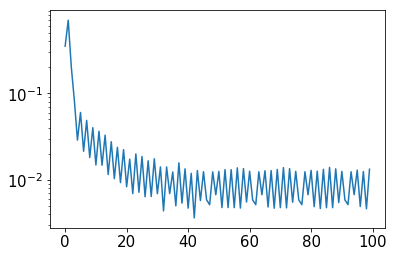

In [376]:
plt.plot(opt_res_ls['a_k'])
plt.yscale('log')

2410009.7669167644


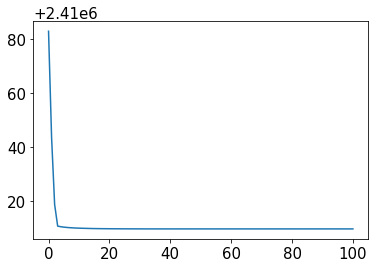

In [377]:
plt.plot(opt_res_ls['obj'])
print(opt_res_ls['obj'][-1])

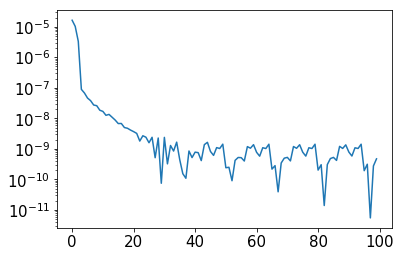

In [378]:
plt.plot(opt_res_ls['stop'])
plt.yscale('log')

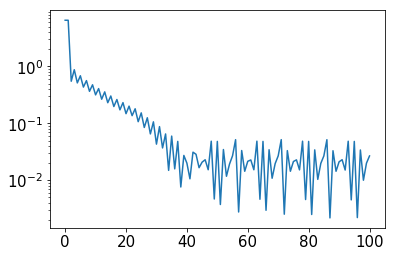

In [379]:
plt.plot(balance_list)
plt.yscale('log')

#### Is this an issue with the capacities (too low and therefore too steep for the inverse demand?) -- I doubt it but well

In [154]:
from amod_ed.result_analysis import plot_cost_all_path


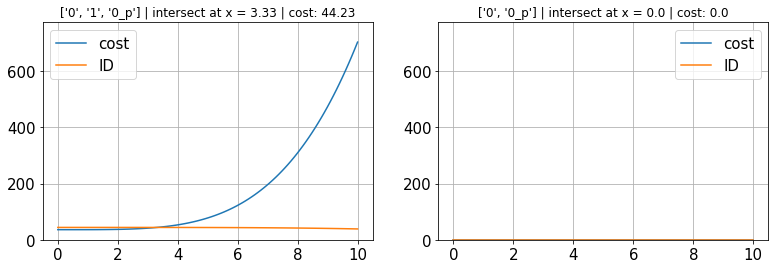

In [368]:
plot_cost_all_path(G_k_real, OD, '0', '0_p')


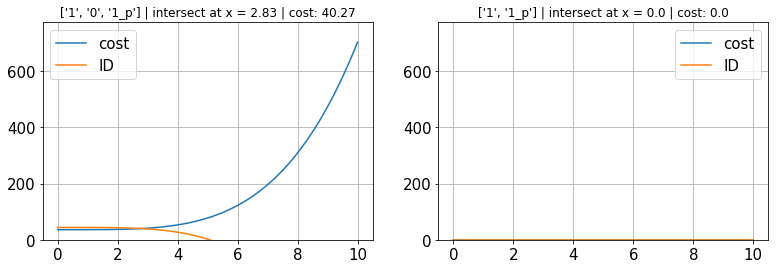

In [369]:
plot_cost_all_path(G_k_real, OD, '1', '1_p')


I don't think it is

# Debugging

Instead of solving iterations, we can just look at ONE inner loop iteration, ONE line search computation, plot the total cost and see where the minimum lies and how far off the actual computed minimum is. 

We can also simply look at the shape of the cost function. 

In [187]:
from amod_ed.routines_icu import AoN, Total_Cost_line_search_val, line_search

In [223]:
alpha = np.linspace(0,1,1000)

In [ ]:
edge_list =[]
for 

Indices where we see it really fails
- 25
- 60
- 90

We see that when Gurobi works, it outperforms the others. However, we have an error arising often (eq_dual) with CVXPY. 

Looking at the shape of the total cost function, it seems well posed and it seems there is only one minimum. 

Maybe, as we do not update the bounds (evolving bounds) then we shoot out too far and it cannot handle those instabilities. 

As we are closer, we do not need to shoot out too far. 

Maybe updating the bounds would help. 


In [395]:
idx=25
c = []
for a in alpha: 
    crt = Total_Cost_line_search_val(G_list_ls[idx].copy(), y_list_ls[idx], a, G_ref.edges())
    c.append(crt)


In [396]:
line_search(G_list_ls[idx].copy(),y_list_ls[idx], G_ref.edges())

solver ECOS: 0.00245029132782877
Status of line search problem :  optimal
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
solver GUROBI 4.628324390409944e-09
Status of line search problem :  optimal
solver CVXOPT 0.00028883737884730044
Status of line search problem :  optimal


array(0.00028884)

In [397]:
print(opt_res_ls['a_k'][idx])

0.00028883740003210094


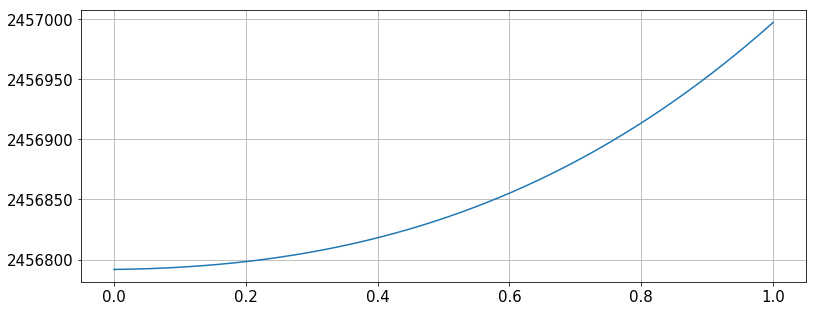

In [398]:
plt.figure(figsize=(13,5))
plt.plot(alpha, np.array(c))
# plt.xlim([0.6,0.7])
# plt.ylim([2410040,2410050])
plt.grid()

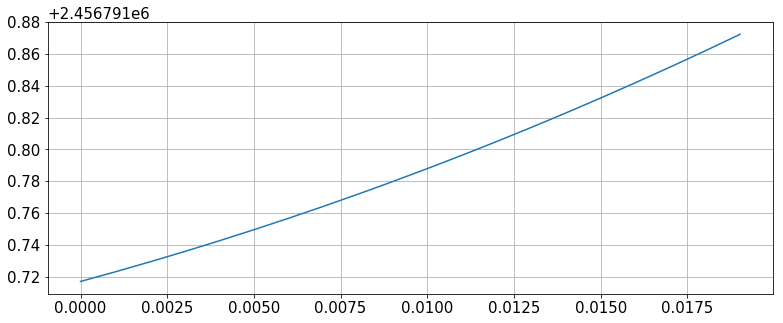

In [399]:
plt.figure(figsize=(13,5))
plt.plot(alpha[:20], np.array(c)[:20])
# plt.xlim([0.6,0.7])
# plt.ylim([242040,242050])
plt.grid()

It works well if beta = 2. However, with beta  = 4 or higher there are some instabilities. 

We can maybe generate results for beta = 2. 

### Evolving bounds? 

Maybe the problem stems from the fact that we are shooting too far out? i.e. we are using the same bounds while we know we are not there. We need the step size to be low but maybe the way the algorithm works cannot go to that level of granularity? 

Results here are complicated to interpret because I am not sure you are allowed to do this (if you change OD, then your flows are no longer feasible and you need to reinitialize also the passenger flows). 

In [303]:
idx = 75

In [302]:
OD

{('0', '0_p'): 10,
 ('1', '1_p'): 10,
 ('0', 'R'): 0,
 ('1', 'R'): 6.494304099094502}

In [313]:
OD_edit = OD.copy()
OD_edit['0','0_p'] = 9.3
OD_edit['1','1_p'] = 3

In [314]:
OD_edit

{('0', '0_p'): 9.3,
 ('1', '1_p'): 3,
 ('0', 'R'): 0,
 ('1', 'R'): 6.494304099094502}

In [315]:
y_k = AoN(G_list_ls[idx], OD_edit)

In [318]:
y_0 = AoN(G_list_ls[idx], OD)

In [319]:
line_search(G_list_ls[idx].copy(),y_k, G_ref.edges())

solver ECOS: 0.99849050511839
Status of line search problem :  optimal_inaccurate
solver CVXOPT 0.9999938437465951
Status of line search problem :  optimal


array(0.99999384)

In [320]:
line_search(G_list_ls[idx].copy(),y_0, G_ref.edges())

solver ECOS: 0.20794622214066613
Status of line search problem :  optimal_inaccurate
solver CVXOPT 0.013450724063641525
Status of line search problem :  optimal


array(0.01345072)

With the initial line search (i.e. not changing the bounds)

In [306]:
line_search(G_list_ls[idx].copy(),y_list_ls[idx], G_ref.edges())

solver ECOS: 0.20794622214066613
Status of line search problem :  optimal_inaccurate
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
solver GUROBI 0.003572849953062729
Status of line search problem :  optimal
solver CVXOPT 0.013450724063641525
Status of line search problem :  optimal


array(0.01345072)

In [309]:
print_final_flows(G_FW[-1])

('0', '1')  :  9.275056281044291
('0', 'R')  :  6.494304099094499
('0', '1_p')  :  2.780752181949789
('0', '0_p')  :  0.7249437189556943
('1', '0')  :  9.27505628104429
('1', 'R')  :  0.0
('1', '0_p')  :  9.275056281044291
('1', '1_p')  :  7.219247818050208


# 2 Nodes with no NN init

In this case we do not do NN init just to disentangle both problems. 

In [19]:
n_nodes=2

In [20]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [21]:
print(os.listdir(path))

['new_init.pkl', 'initial_setup.pkl', 'line_search_notNNinit.pkl', 'new_init_with_step.pkl']


In [22]:
filename=os.listdir(path)[-2]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance1, opt_res1, OD_list, balance_list1, params = pickle.load(f)

line_search_notNNinit.pkl


In [14]:
params

{'L': 10000,
 'ni': 20,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

Even if the solution yielded "optimal inaccurate", we seem to have a much better behavior than before. 

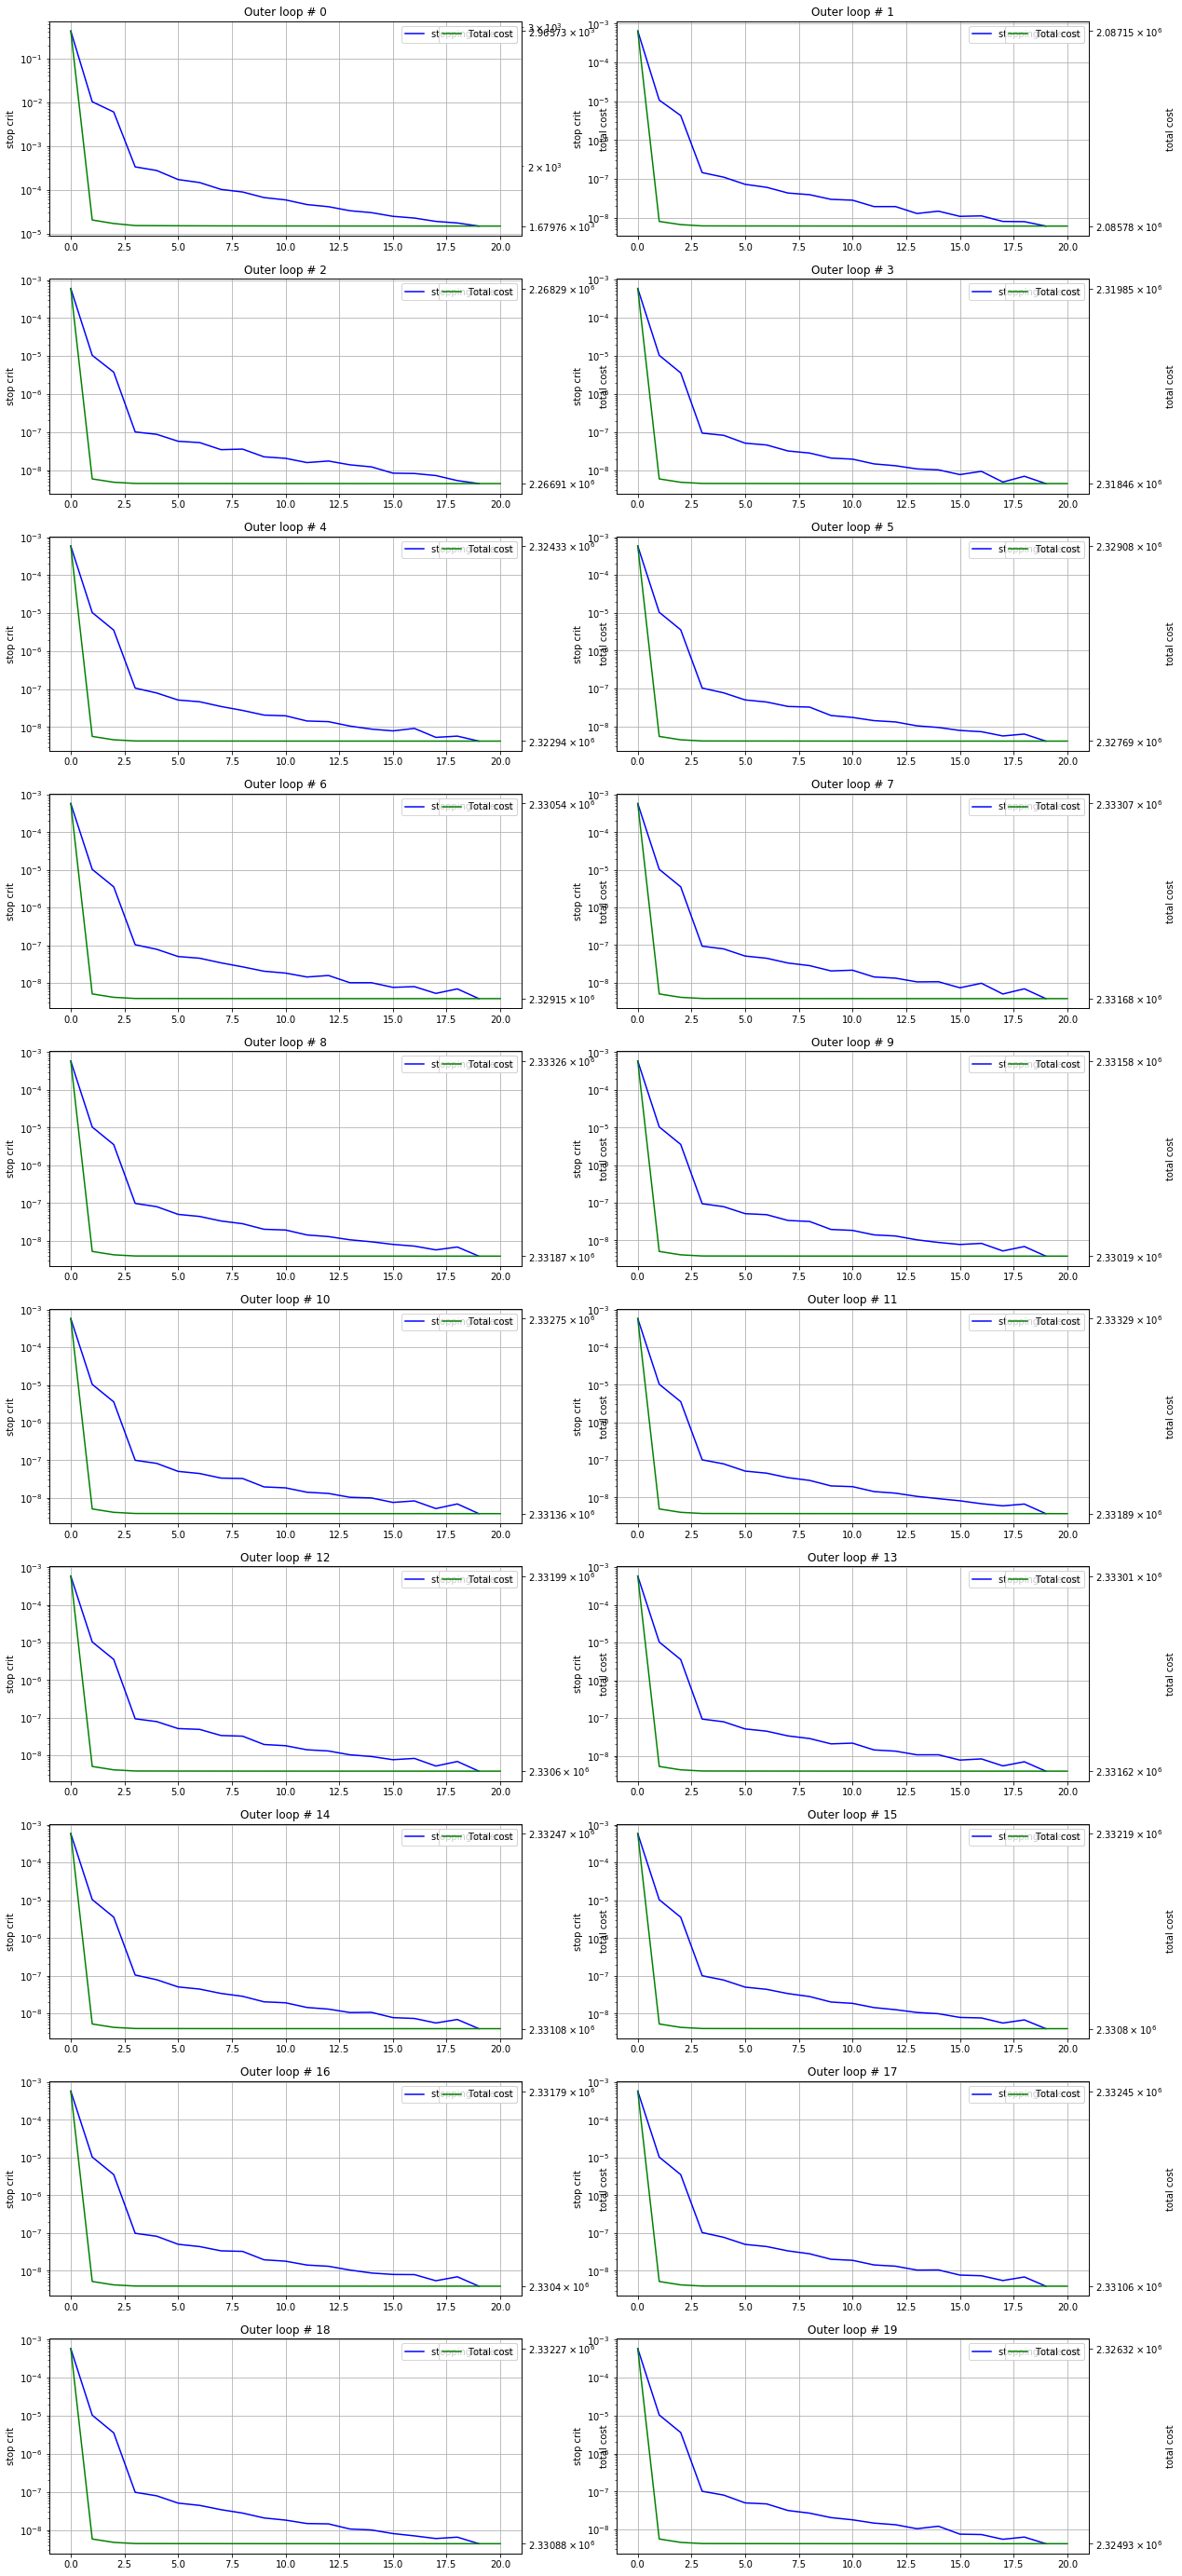

In [15]:
plot_stop_and_cost(opt_res1)

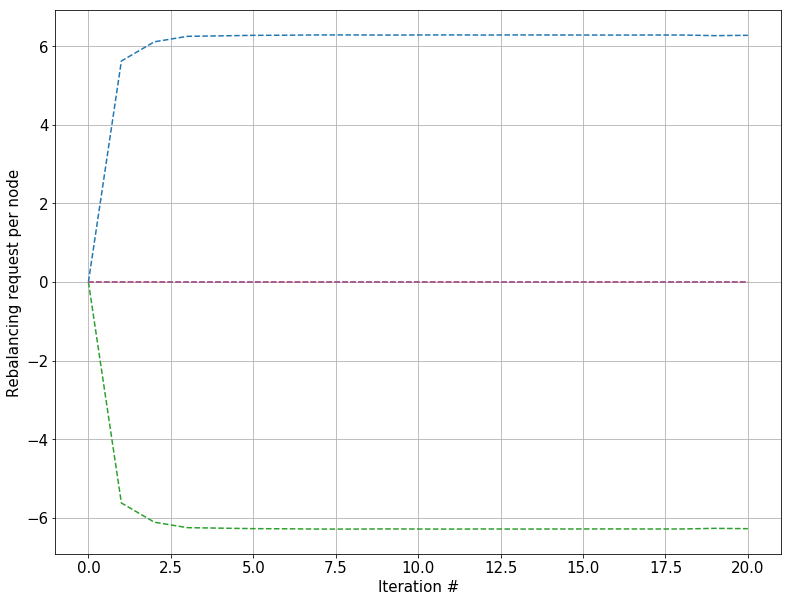

In [16]:
plot_ri_list(ri_FW1, save = False, path = None)

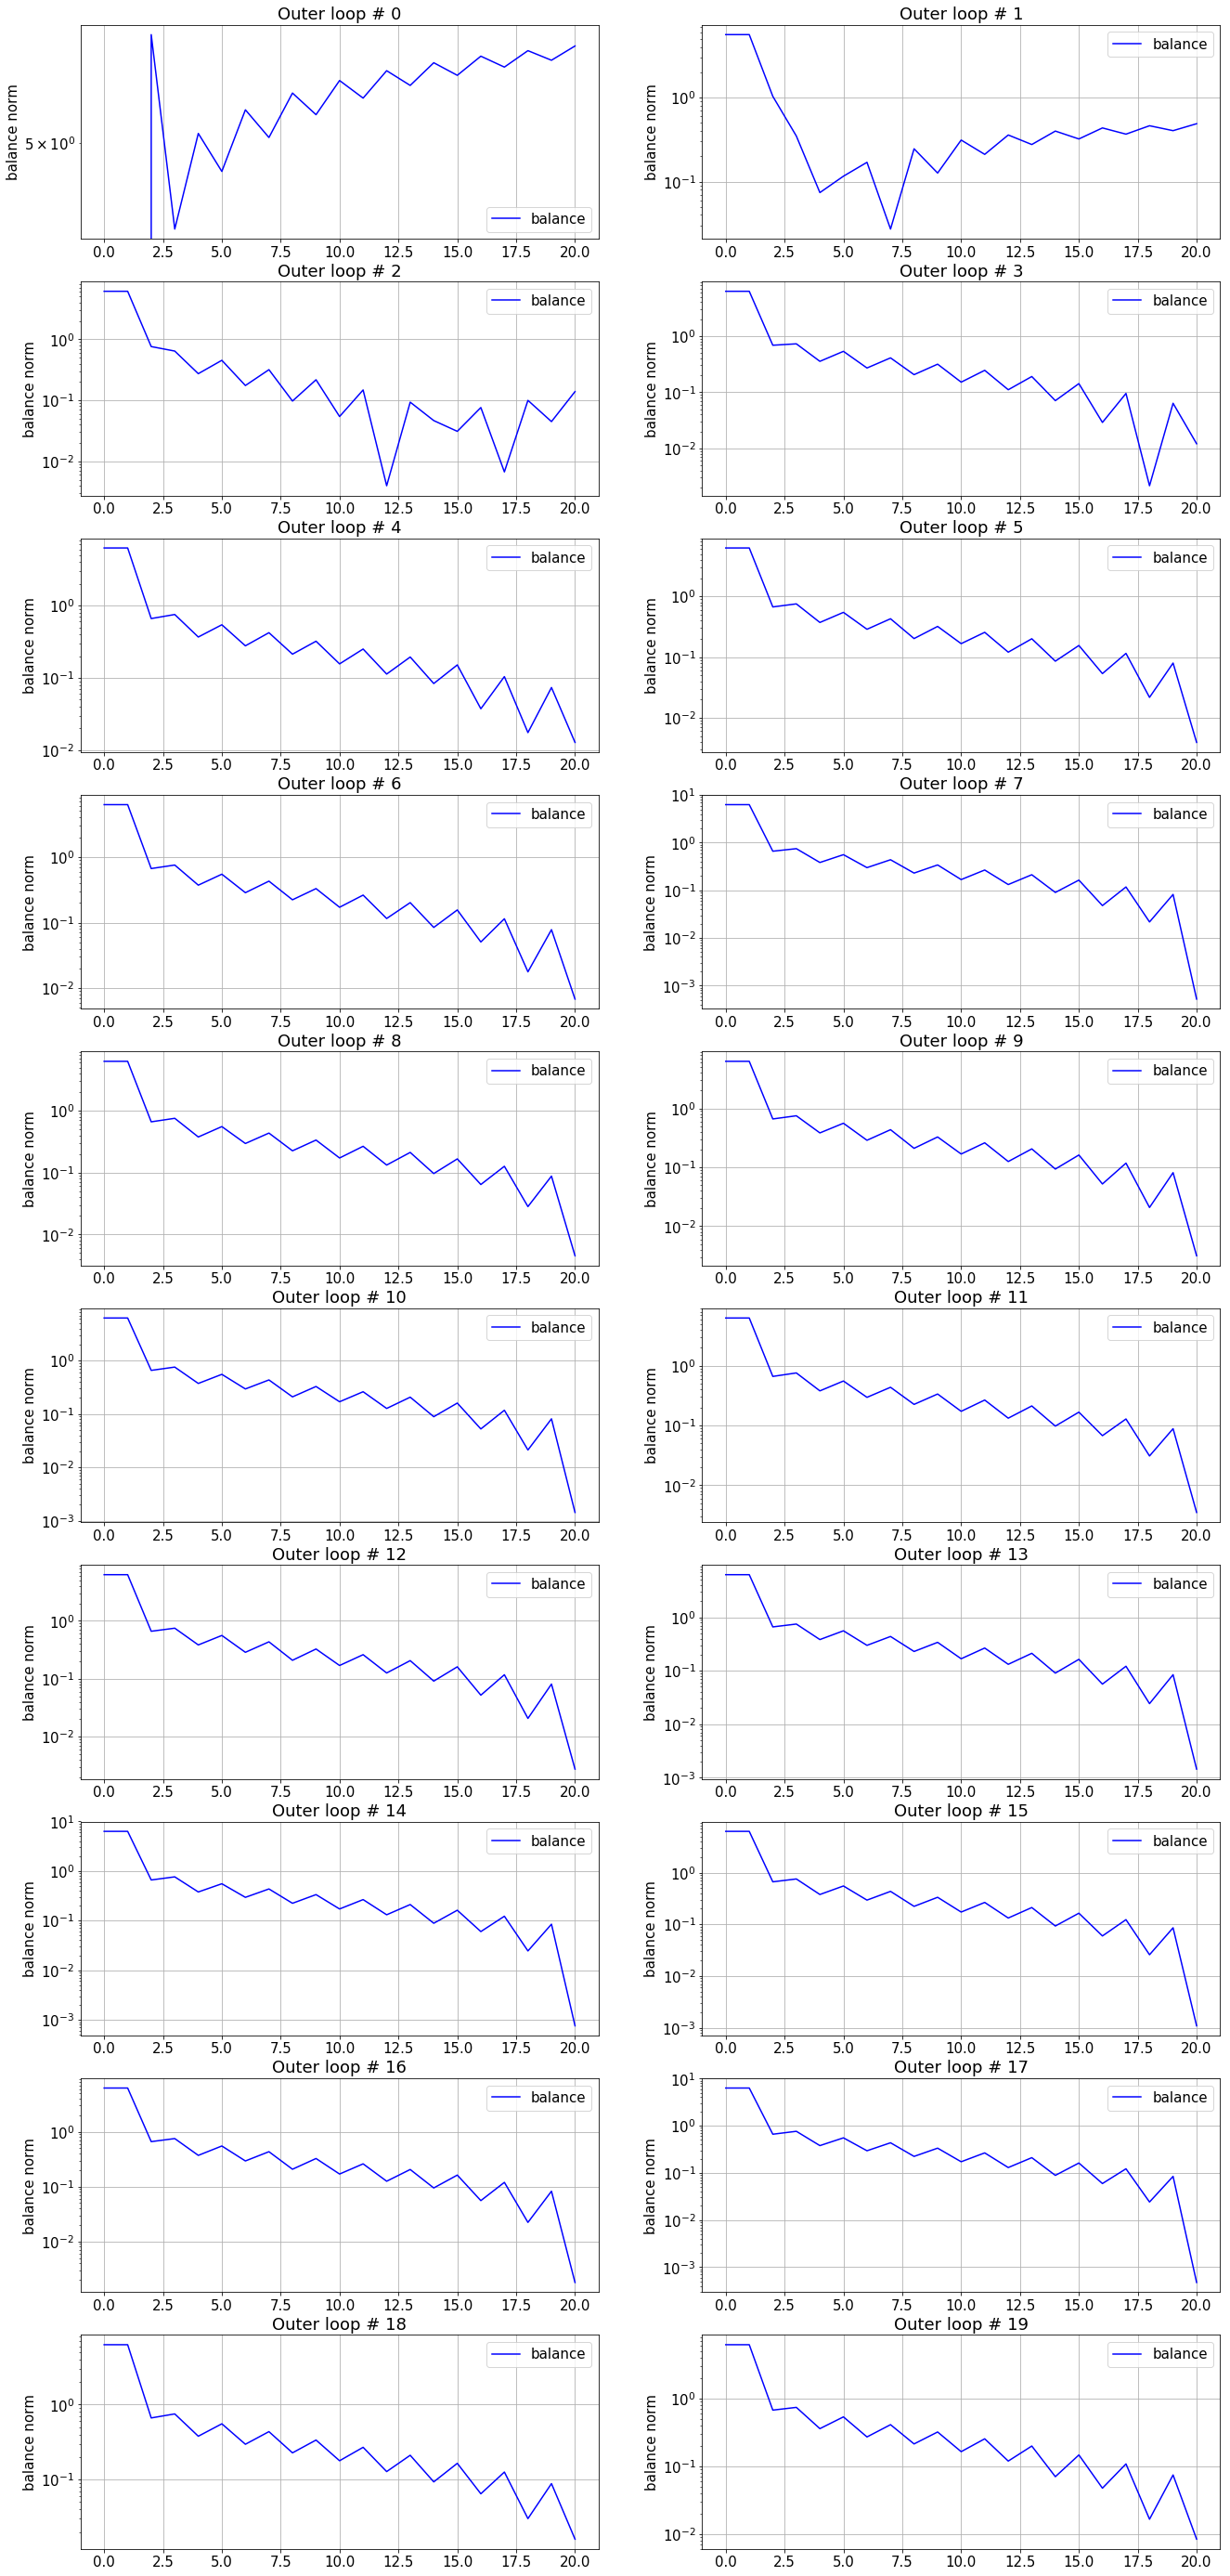

In [17]:
plot_balance_list(balance_list1, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

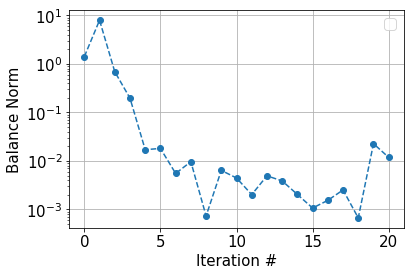

In [18]:
b=np.linalg.norm(balance1, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

# 2 Nodes with no NN init, with a longer inner iteration

In this case we do not do NN init just to disentangle both problems. 

In the previous iteration we have seen that we get somehow stuck at some stage (due to the initialization probably). As we have numerical problems with the initialization, we also make it run with longer inner iterations to see if that is indeed the problem. 

We are hoping that we get a decrease in balance after the longer iterations. 

In [34]:
n_nodes=2

In [35]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [36]:
print(os.listdir(path))

['line_search_notNNinit_longerNI.pkl', 'new_init.pkl', 'initial_setup.pkl', 'line_search_notNNinit.pkl', 'line_search_withNNinit.pkl', 'new_init_with_step.pkl']


In [37]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance1, opt_res1, OD_list, balance_list1, params = pickle.load(f)

line_search_notNNinit_longerNI.pkl


In [38]:
params

{'L': 10000,
 'ni': 20,
 'no': 11,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

Even if the solution yielded "optimal inaccurate", we seem to have a much better behavior than before. 

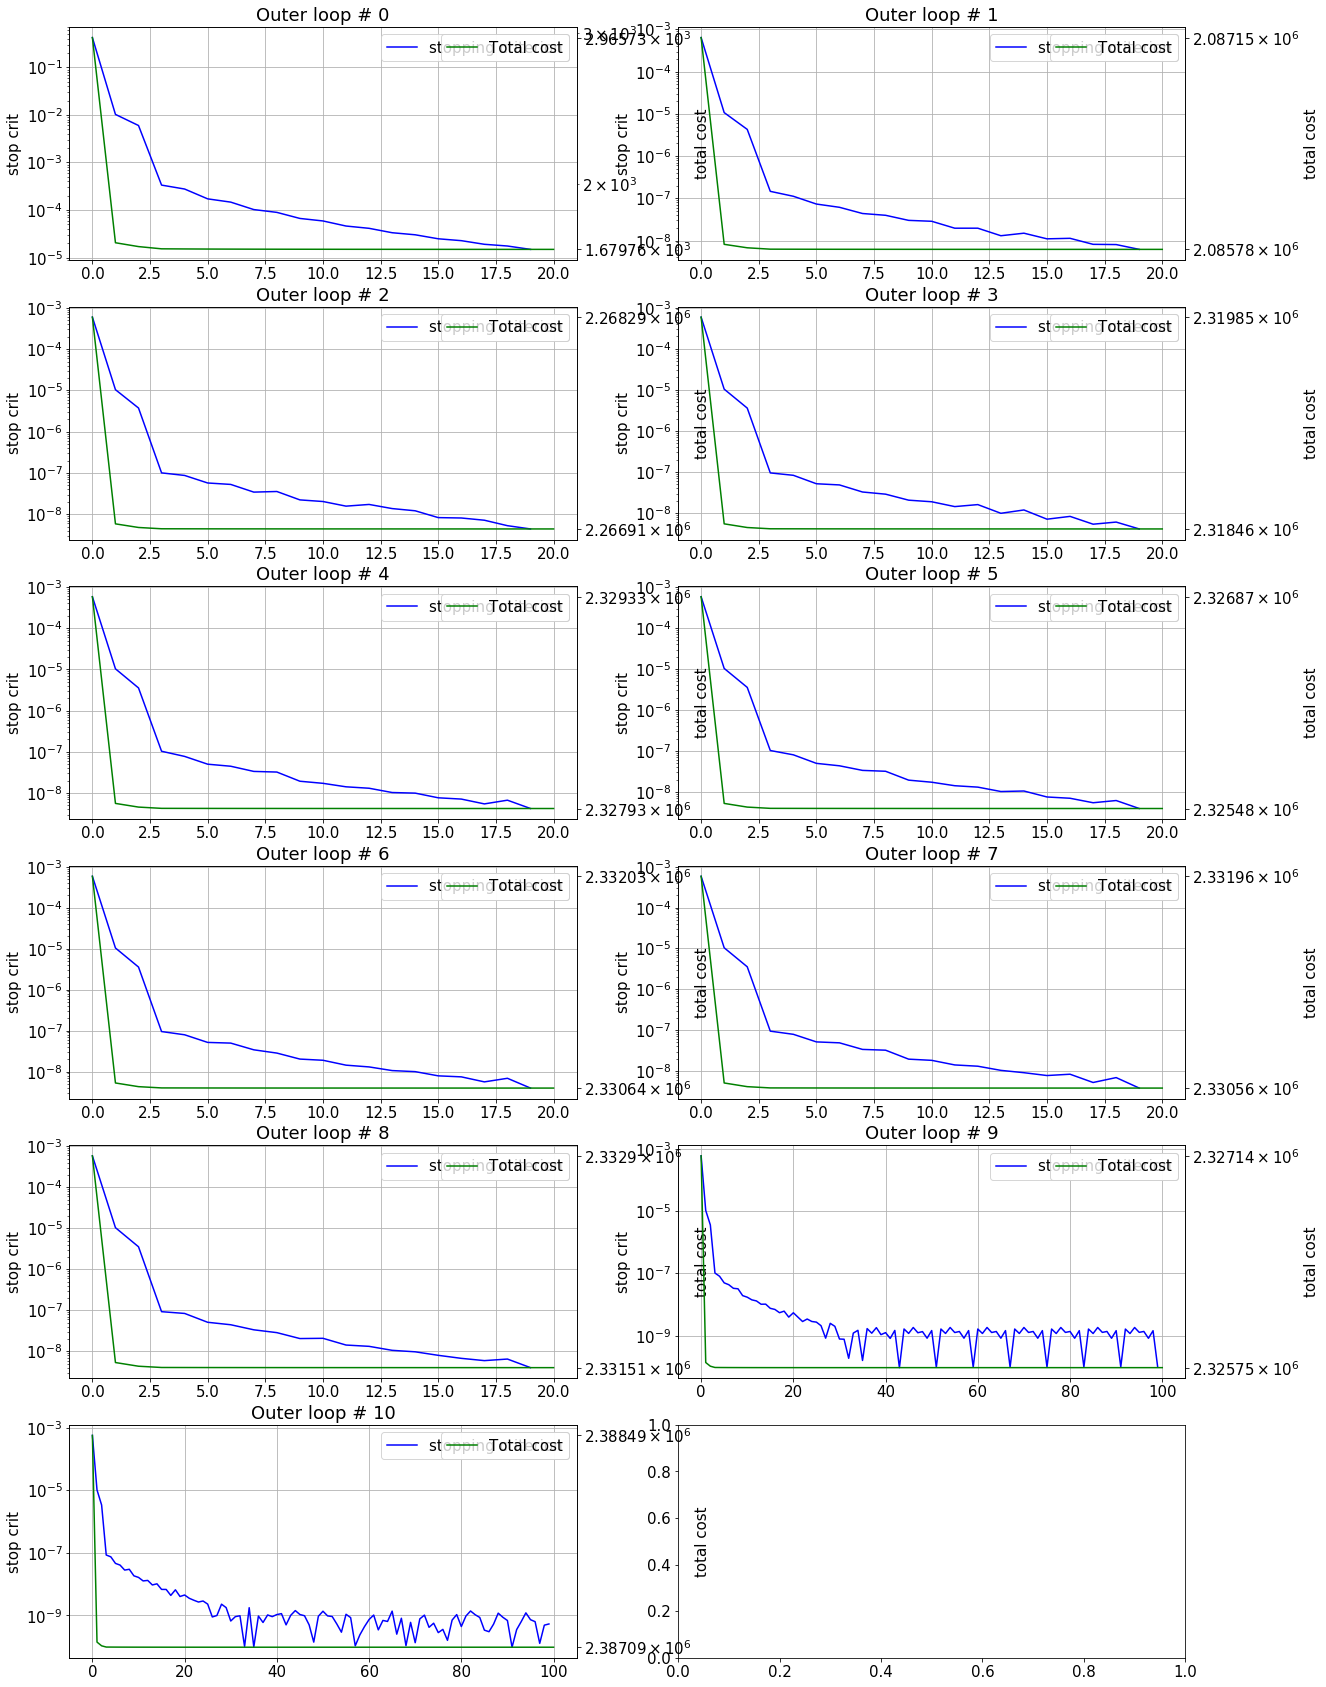

In [39]:
plot_stop_and_cost(opt_res1)

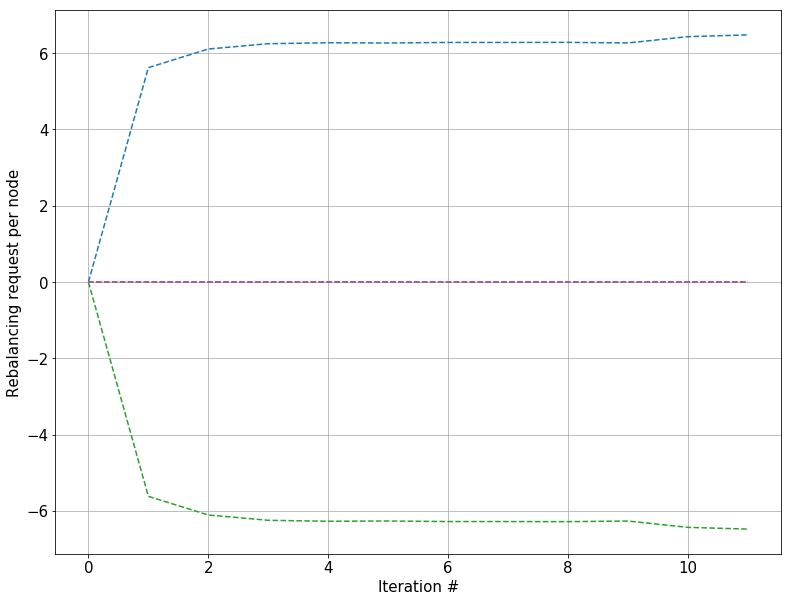

In [40]:
plot_ri_list(ri_FW1, save = False, path = None)

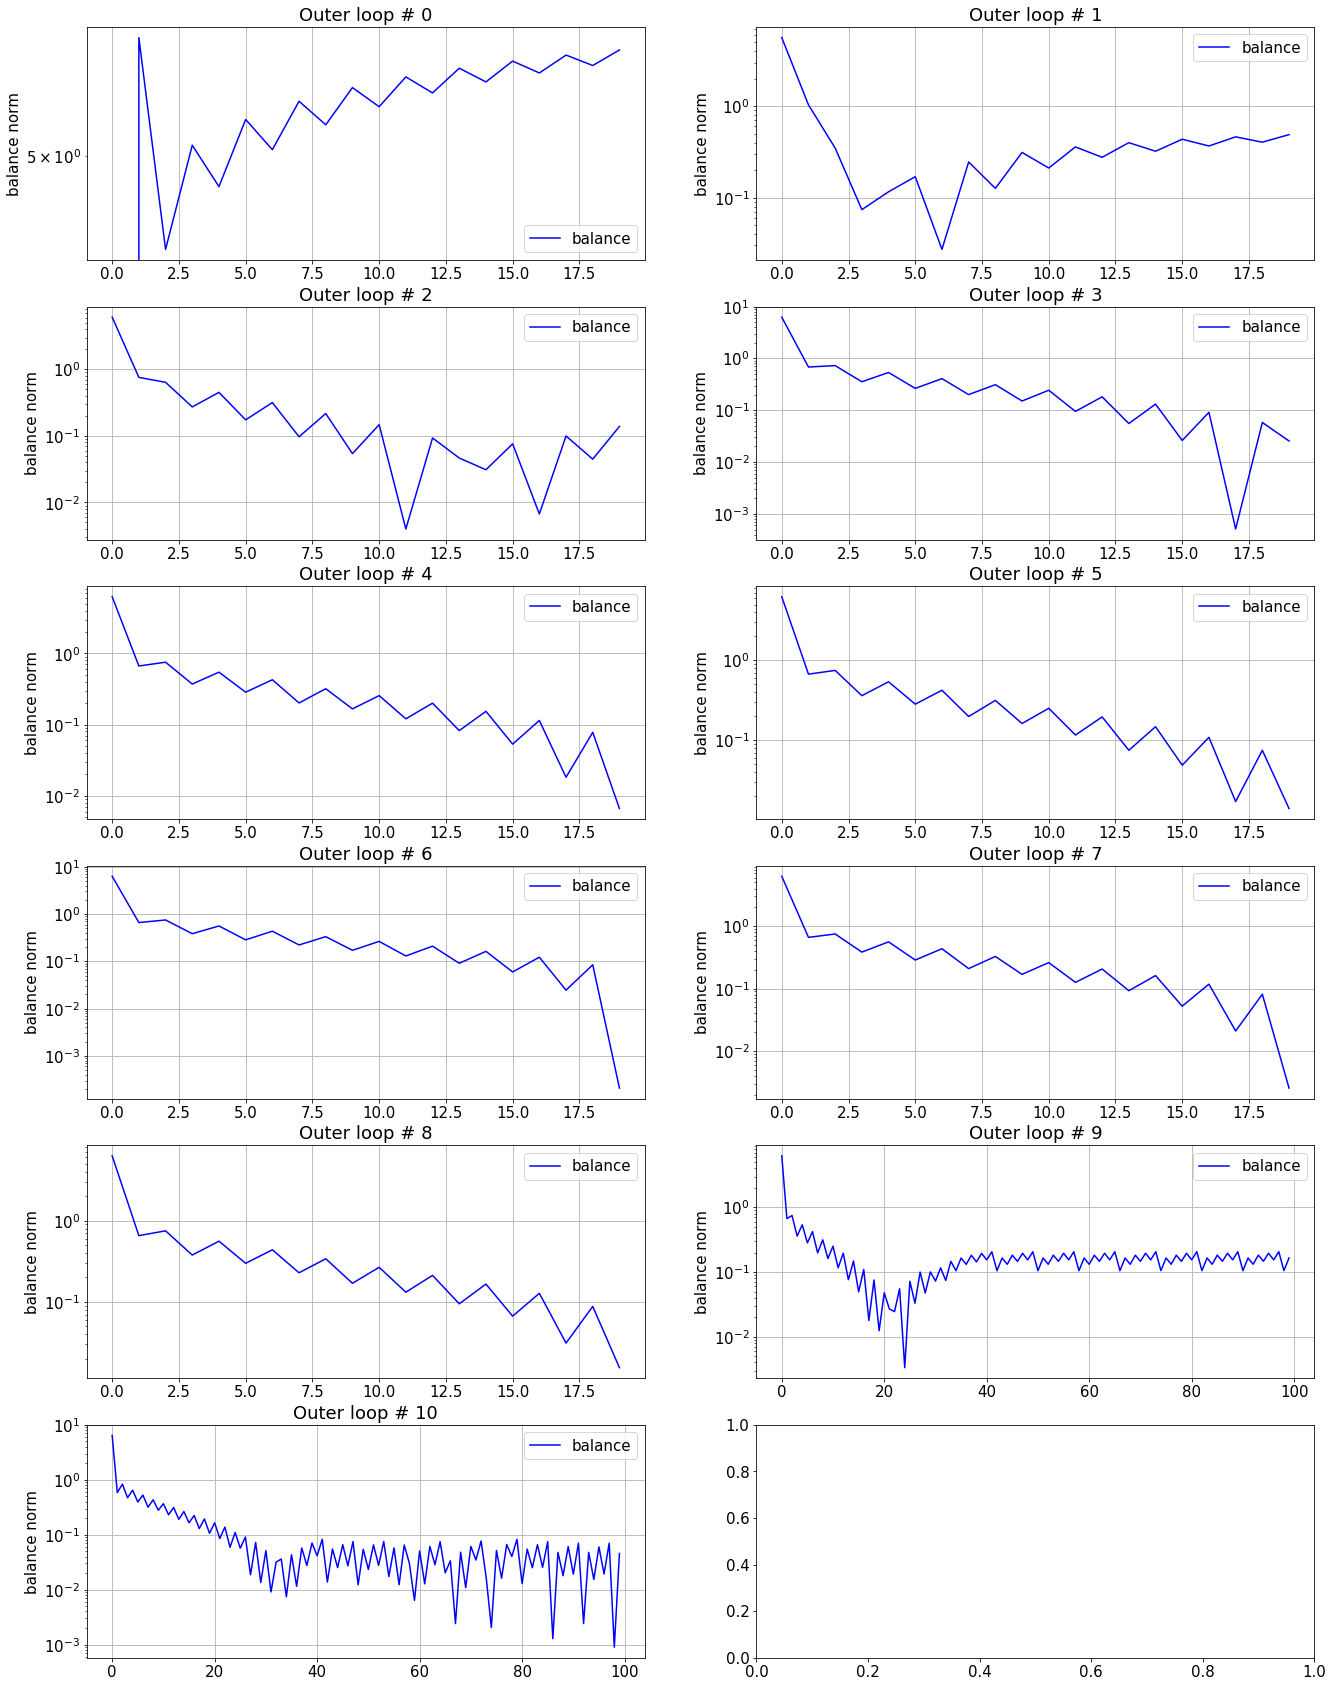

In [41]:
plot_balance_list(balance_list1, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

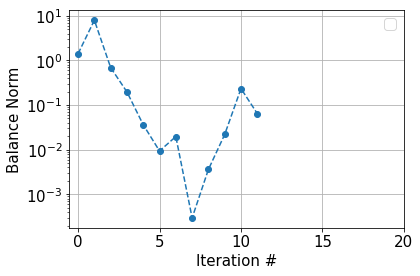

In [42]:
b=np.linalg.norm(balance1, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

# 2 Nodes WITH NN init

In this case we add NN init to see if we have better behavior, or not. 

In [23]:
n_nodes=2

In [24]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [44]:
print(os.listdir(path))

['line_search_notNNinit_longerNI.pkl', 'new_init.pkl', 'initial_setup.pkl', 'line_search_notNNinit.pkl', 'line_search_withNNinit.pkl', 'new_init_with_step.pkl']


In [45]:
filename=os.listdir(path)[-2]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance1, opt_res1, OD_list, balance_list1, params = pickle.load(f)

line_search_withNNinit.pkl


In [27]:
params

{'L': 10000,
 'ni': 20,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

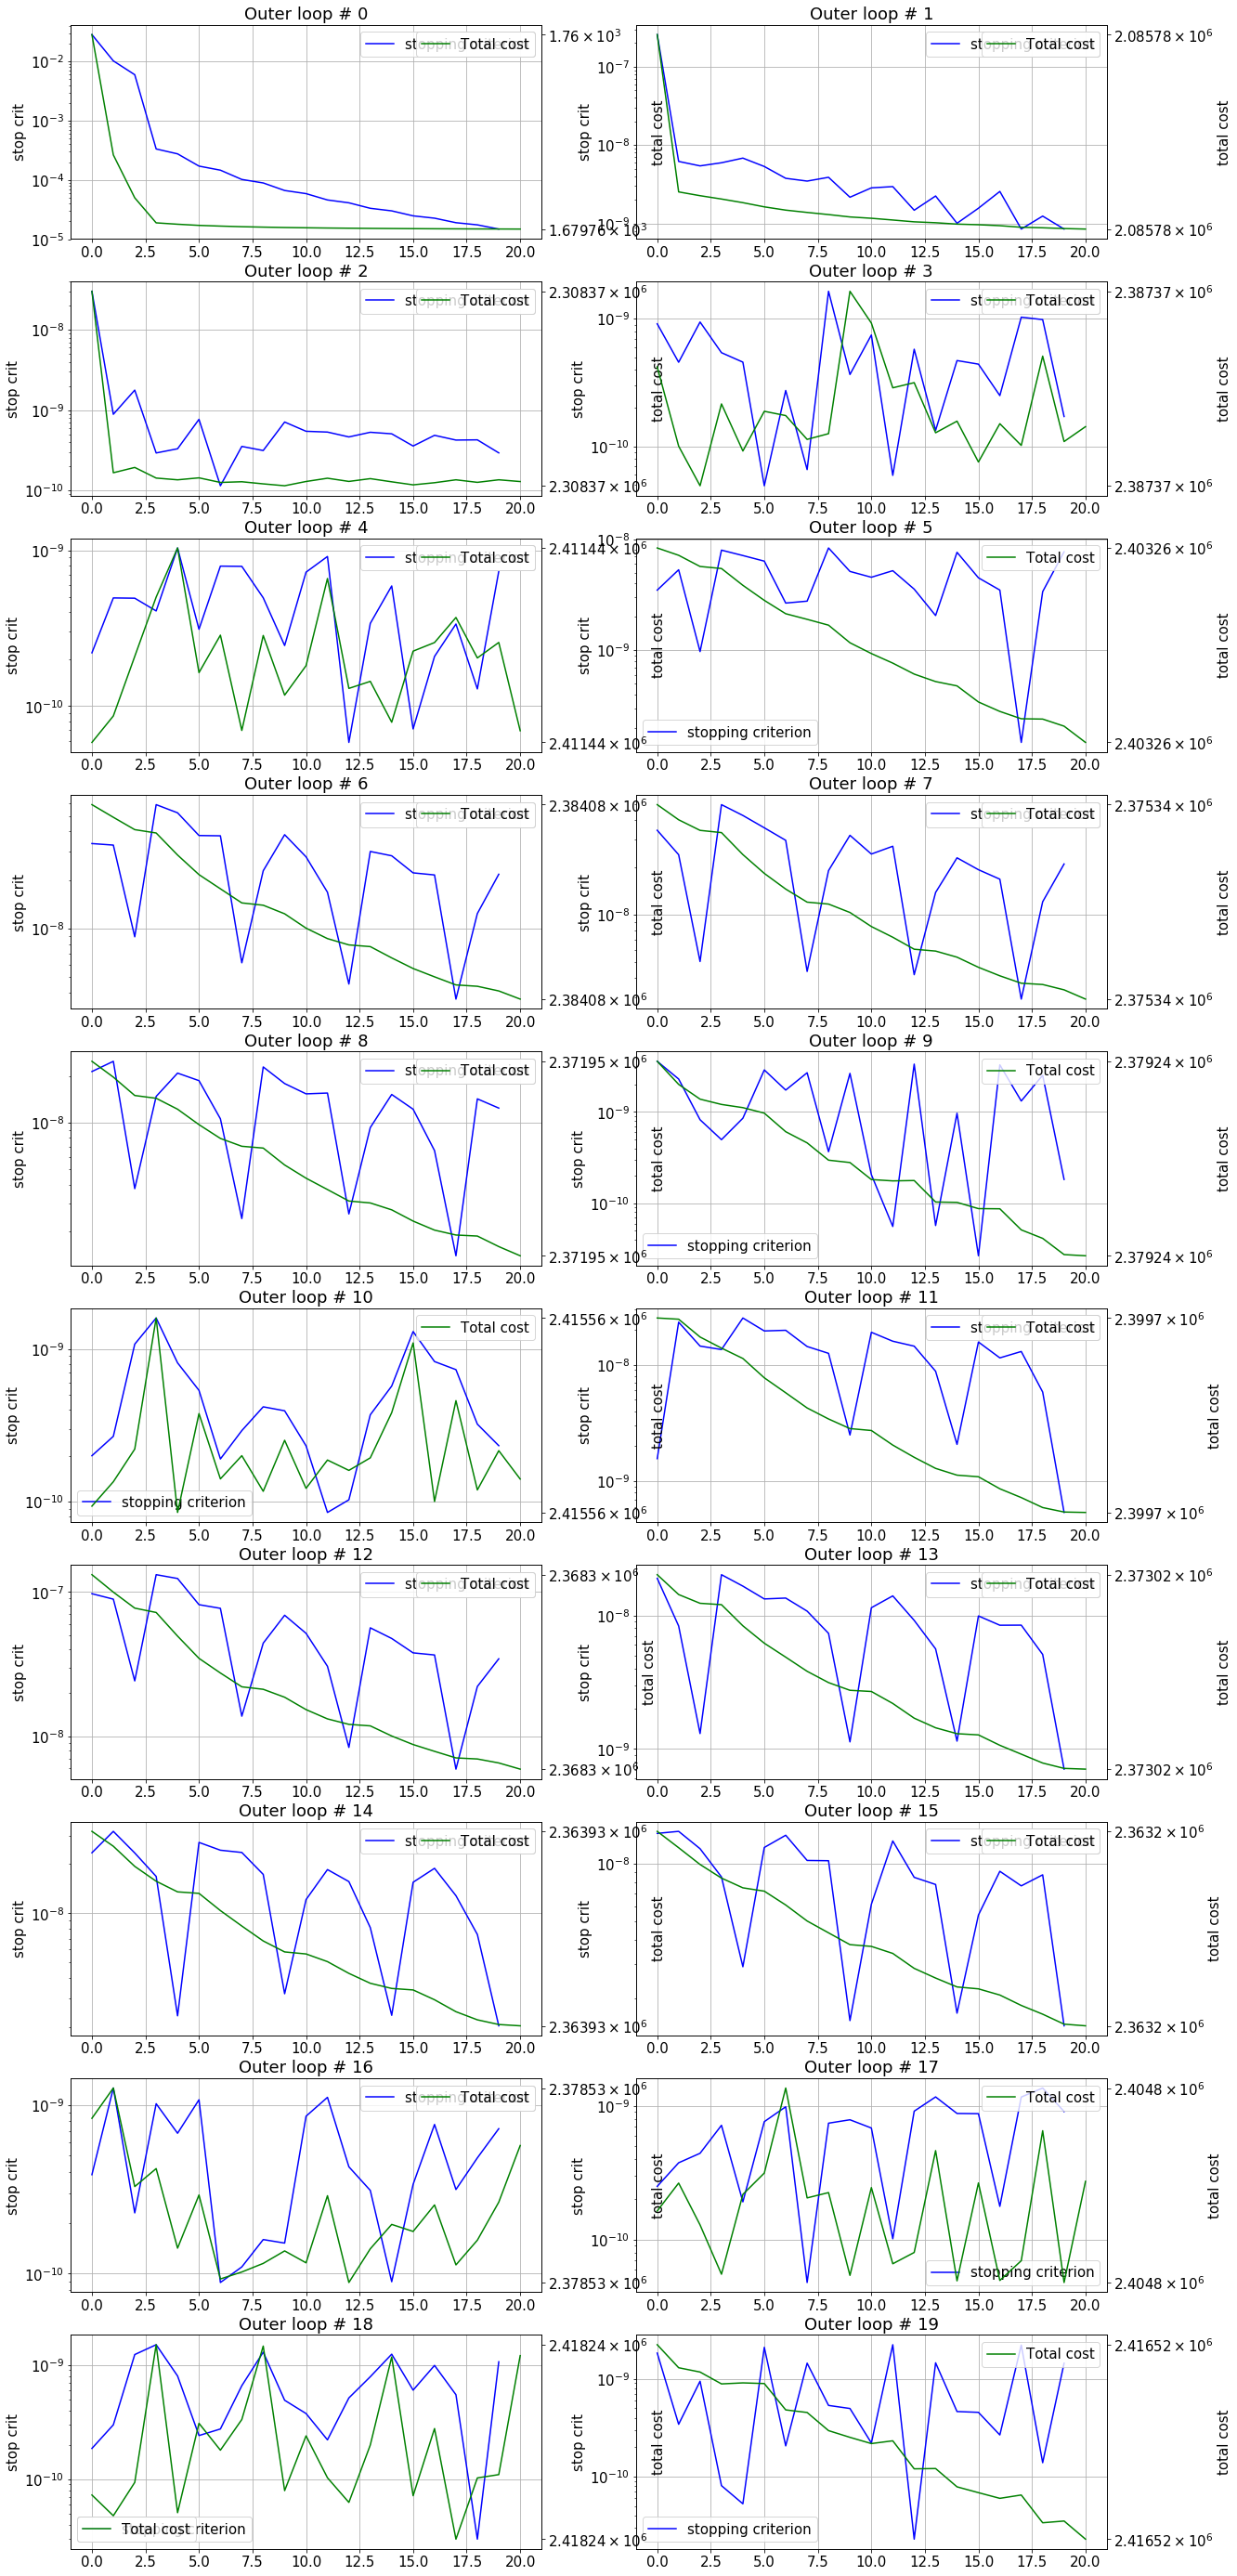

In [28]:
plot_stop_and_cost(opt_res1)

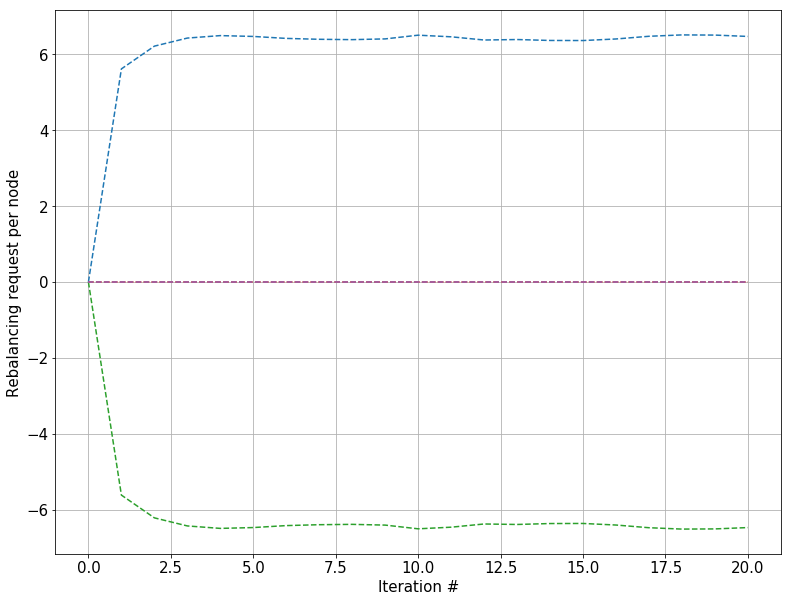

In [46]:
plot_ri_list(ri_FW1, save = False, path = None)

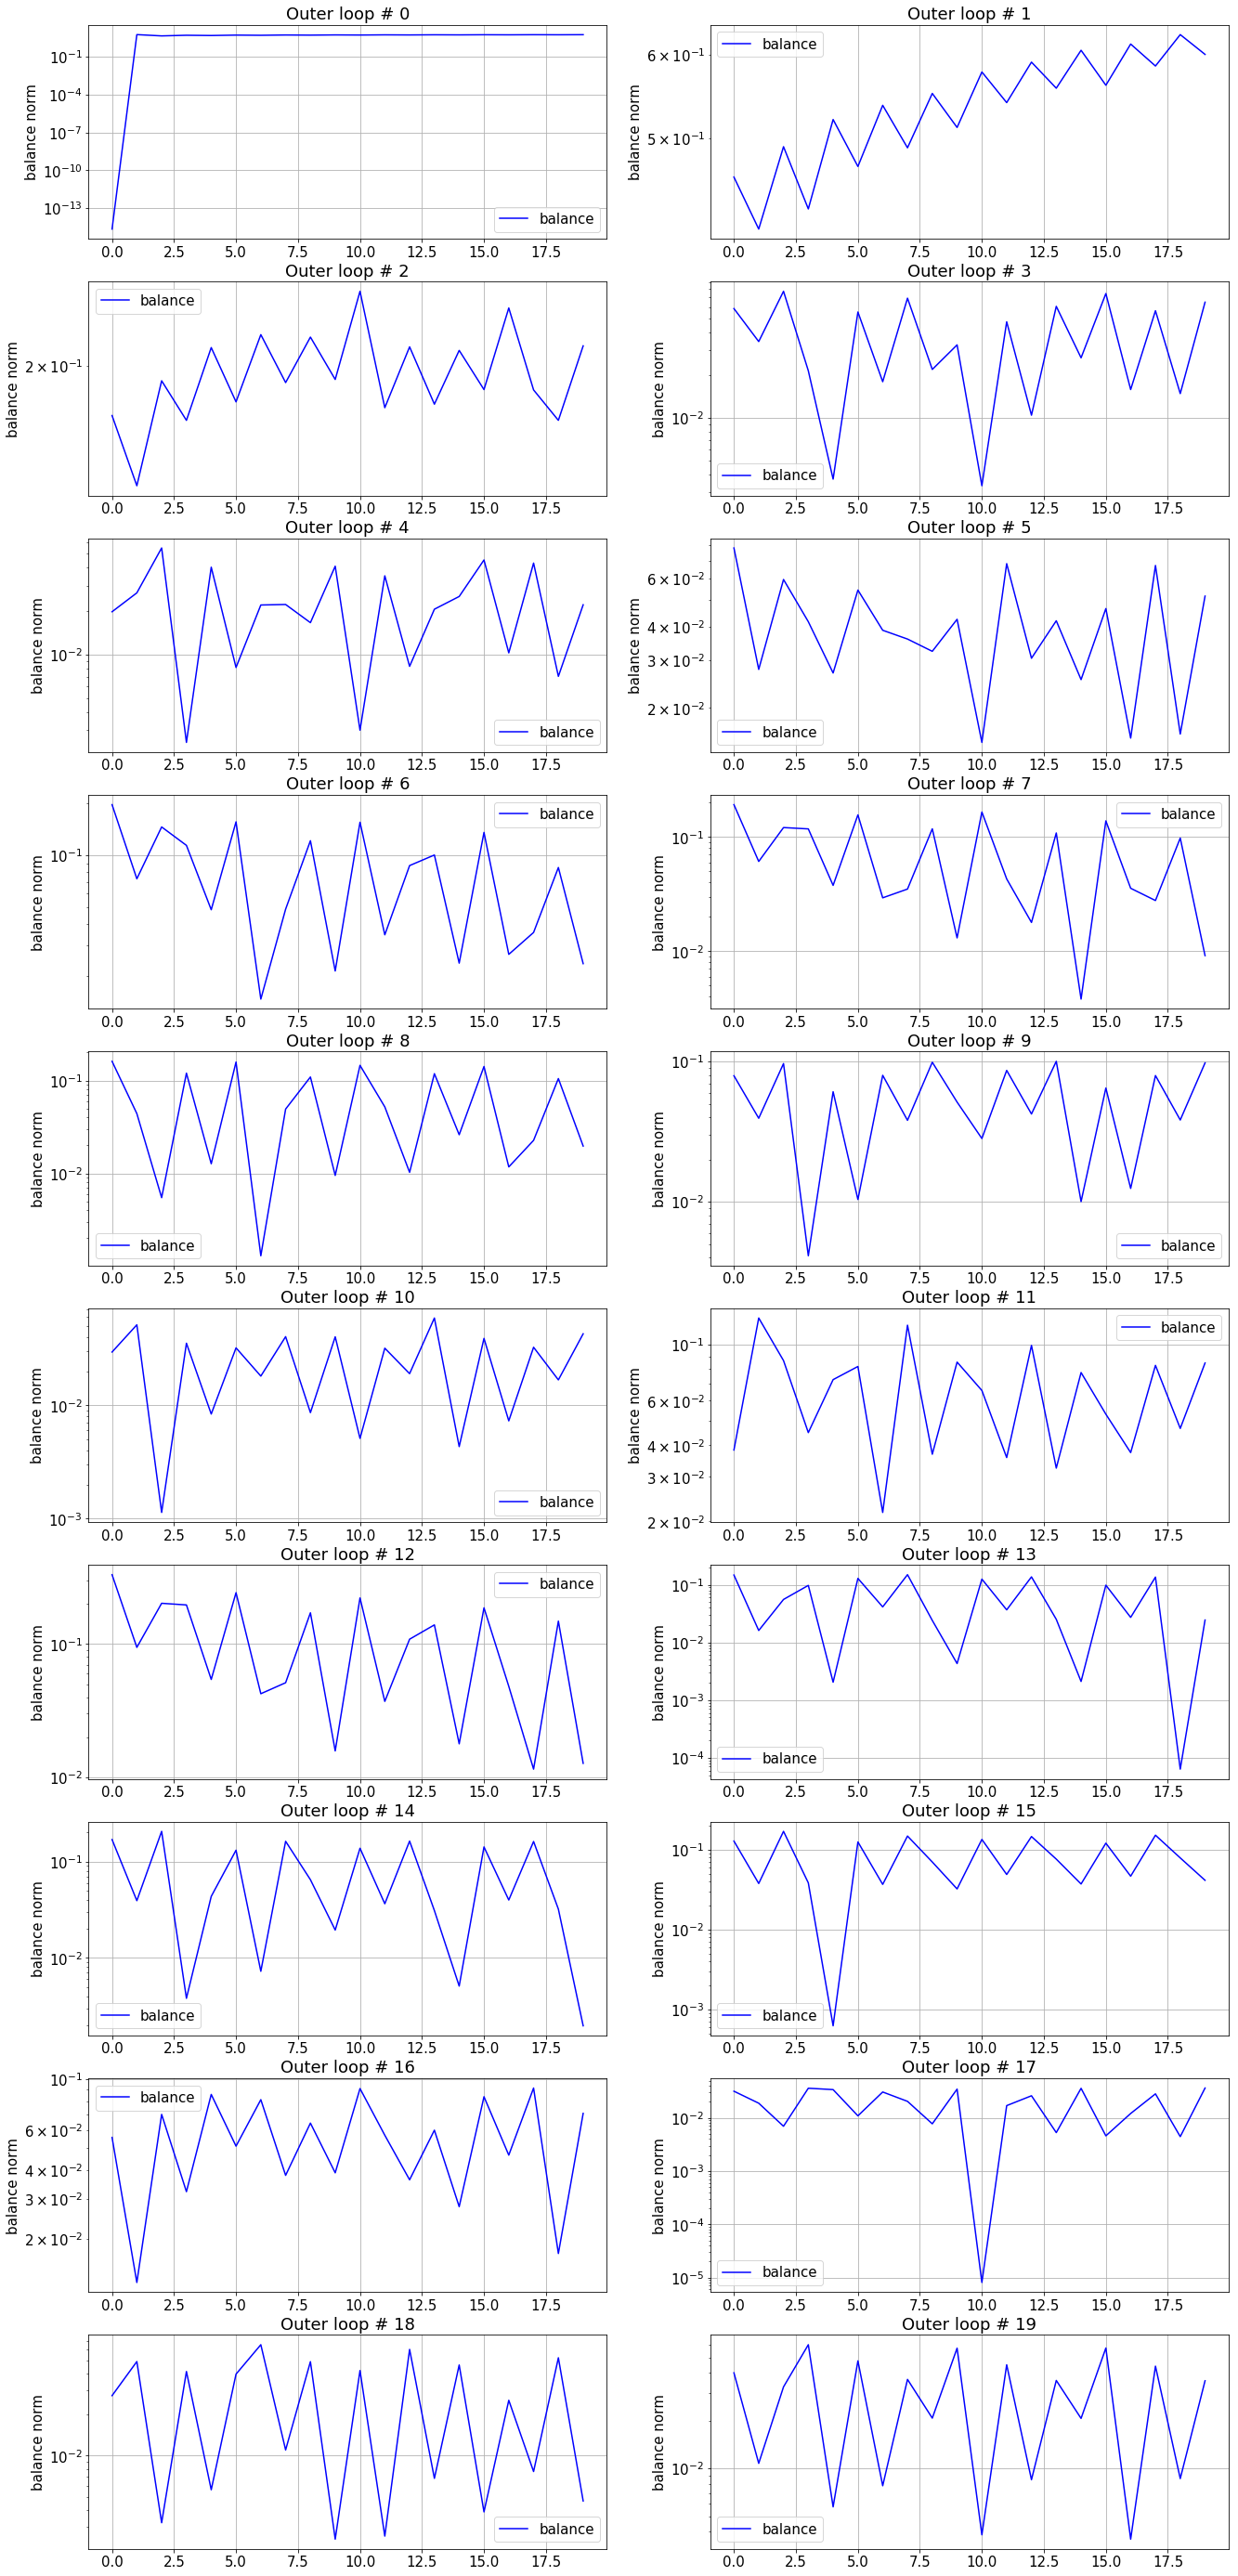

In [32]:
plot_balance_list(balance_list1, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

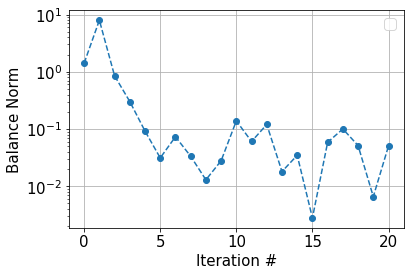

In [31]:
b=np.linalg.norm(balance1, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')